## Logistic regression for master thesis 2021. Linn Alexandra Emhjellen

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import datetime as dt
import math as mt
# importing libraries
import statsmodels.api as sm
import pandas as pd 

import statsmodels.tools.eval_measures as smeval

### Data

In [26]:
df = pd.read_excel('Emhjellen_meteorological_Vestland_1991_2020.xlsx')
df= df.dropna()

In [27]:
year = df['Date'].dt.year
month = df['Date'].dt.month

In [28]:
df['Temp*Prec'] = df['Mean_daily_temp']*df['Daily_prec']

df['dummy_variable'] = 1

### Seasons

In [29]:
# rockfall climate, daily temp

# spring

march = df[month== 3]
april = df[month== 4]
may = df[month== 5]

spring = [march, april, may]
spring = pd.concat(spring)


# summer 

jun = df[month == 6]
jul = df[month == 7]
aug = df[month == 8]

summer = [jun, jul, aug]
summer = pd.concat(summer)


# autumn

sep = df[month == 9]
okt = df[month == 10]
nov = df[month == 11]

autumn = [sep, okt, nov]
autumn = pd.concat(autumn)

# winter

dec = df[month == 12]
jan = df[month == 1]
feb = df[month == 2]

winter = [dec, jan, feb]
winter = pd.concat(winter)

In [30]:
Seasons = [spring, summer, autumn, winter]

In [31]:
#Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
#         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

In [32]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]


In [33]:
Months = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

### Daily temperature for each month for Vestland, ignore locations


In [34]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []
likelihood_chi = []
likelihood = []

aic = []
llr_pvalue = []

for k in Months:
    mean_daily_temp = k['Mean_daily_temp'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland.append(log_reg.bse[1])
    likelihood_chi.append((log_reg.llr))
    likelihood.append(log_reg.llf)
    
    llr_pvalue.append(log_reg.llr_pvalue)
    aic.append(log_reg.aic)

Optimization terminated successfully.
         Current function value: 0.323205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.364557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312890
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.221716
  

In [35]:
llr_pvalue

[3.8052764966049993e-53,
 4.8602701364523486e-54,
 6.760876575527355e-10,
 0.8966694189990766,
 0.7653837950396365,
 0.001516014383149331,
 0.5942958503723224,
 0.5436399780130469,
 0.026148741531672525,
 0.7041091587740351,
 0.21666184417373663,
 4.949932376281195e-30]

In [36]:
aic

[4486.8587050038095,
 4340.87942717477,
 5327.255934466648,
 3949.5384082073247,
 3104.3011701020905,
 2568.266782363371,
 2235.7939033261096,
 2552.00468210273,
 2925.866095639004,
 2735.98860201146,
 2873.942148187631,
 3400.281718176848]

### Intercept-only model

In [61]:
intercepts_null_model = []
standard_error_coef_null_model = []
likelihood_ratio_chi = []

for i in Locations:
    
    intercepts_k = []
    standard_error_coef_k = []
    probability_rockfall_k = []
    likelihood_ratio_chi_k = []
   
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k['dummy_variable'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            
    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
    
            standard_error_coef_k.append(log_reg.bse[0])
            
            prob_rockfall =  np.exp(log_reg.params[0])/(1+np.exp(log_reg.params[0]))
            probability_rockfall_k.append(prob_rockfall)
            
            likelihood_ratio_chi_k.append(log_reg.llr)
            
            
    likelihood_ratio_chi.append(likelihood_ratio_chi_k)
    intercepts_null_model.append(intercepts_k)
    standard_error_coef_null_model.append(standard_error_coef_k)

<ipython-input-61-5f21f2233831>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-61-5f21f2233831>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]


Optimization terminated successfully.
         Current function value: 0.311735
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.262674
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.190096
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.253037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.149995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270213
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.168263
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.217792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309838
  

Optimization terminated successfully.
         Current function value: 0.205055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.219449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.197418
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.181642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.188113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.202775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.279482
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.283188
  

Optimization terminated successfully.
         Current function value: 0.312082
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.211197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.125211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.168904
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.127431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.149388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.066655
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.121240
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.102751
  

In [62]:
likelihood_ratio_chi

[[1.3907822449255036e-08,
  2.411240984656615e-09,
  4.567937139654532e-10,
  8.222855285566766e-09,
  3.911154067282041e-09,
  1.4442377960222075e-08,
  2.4118378405546537e-09,
  1.1804388577729696e-09,
  1.6714778894311166e-08,
  7.656524303456536e-09,
  2.9239572540973313e-08,
  4.178389190201415e-09],
 [1.3964950085210148e-08,
  3.42953399012913e-09,
  2.5127775415967335e-08,
  1.1857594017783413e-08,
  3.736545295396354e-09,
  4.565322342386935e-09,
  7.906095333964913e-09,
  1.5213203141684062e-08,
  6.4634662066964665e-09,
  2.2168933355715126e-12,
  8.085407898761332e-10,
  3.381842361704912e-08],
 [2.6379780138086062e-08,
  1.4211025245458586e-08,
  6.071729785617208e-09,
  4.9496122755954275e-09,
  6.986056177993305e-10,
  5.707079253625125e-11,
  2.4442670110147446e-12,
  2.1184121123951627e-09,
  2.9749003260803875e-09,
  1.5152920695982175e-08,
  1.9491267266857903e-08,
  1.0259498139930656e-08],
 [3.979039320256561e-13,
  2.4112125629471848e-09,
  2.8700242182821967e-09,


In [73]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []
likelihood_chi = []

for k in Months:
    mean_daily_temp = k['dummy_variable'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    #slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    #standard_error_slope_Vestland.append(log_reg.bse[1])
    likelihood_chi.append((log_reg.llr))

Optimization terminated successfully.
         Current function value: 0.367165
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.249133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.221728
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242073
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.269812
  

In [74]:
likelihood_chi

[4.1664952732389793e-07,
 8.684764907229692e-09,
 1.6067588148871437e-07,
 2.8001477403449826e-07,
 1.1541078492882662e-07,
 9.386894816998392e-08,
 6.7043401941191405e-09,
 2.58395175478654e-07,
 3.5197444958612323e-07,
 2.8718432076857425e-07,
 1.1471820471342653e-07,
 1.3829958334099501e-07]

In [10]:
intercepts_null_model_months = []
standard_error_coef_null_model_months = []


Months_null_model = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

for i in Months_null_model:
    
    intercepts_k = []
    standard_error_coef_k = []
    
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        
            mean_daily_temp = k['dummy_variable'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            
    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
    
            standard_error_coef_k.append(log_reg.bse[0])
            

    intercepts_null_model_months.append(intercepts_k)
    standard_error_coef_null_model_months.append(standard_error_coef_k)

Optimization terminated successfully.
         Current function value: 0.406334
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.466910
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.522410
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.195077
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.226335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399721
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.375205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.270758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.220322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201578
  

Optimization terminated successfully.
         Current function value: 0.147768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.155492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402161
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.274699
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.211197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.031347
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.149995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.088320
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244930
  

Optimization terminated successfully.
         Current function value: 0.361423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.177877
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.191784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.494192
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.323592
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.242036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.170685
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.123541
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.184907
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.230192
  

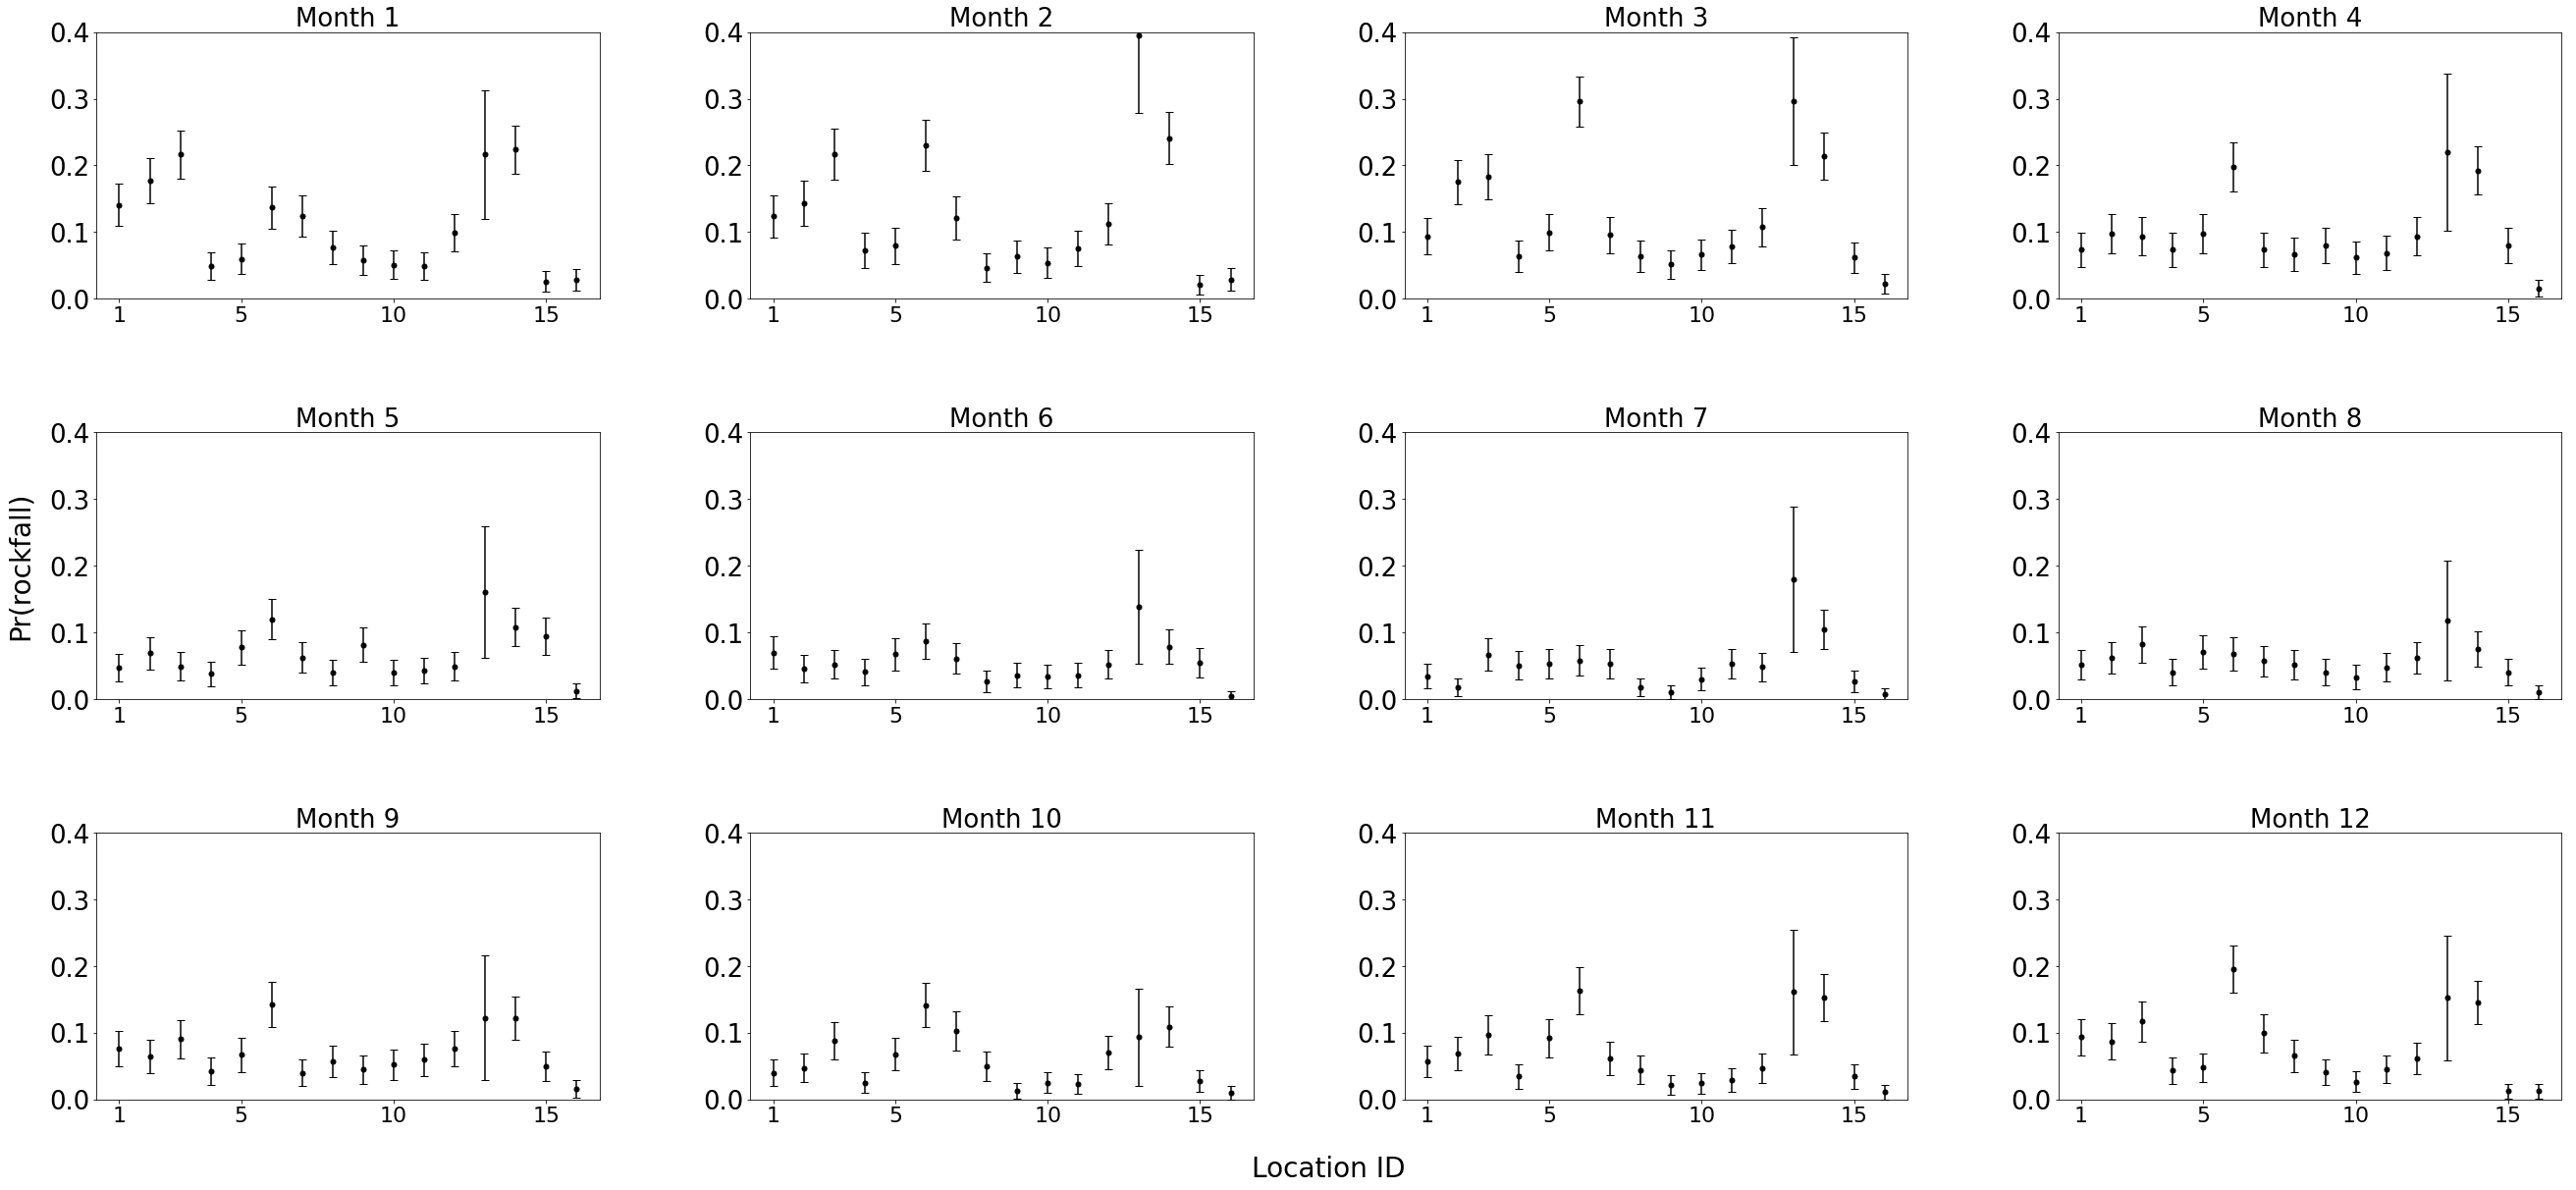

In [11]:
fig = plt.figure(figsize=(45, 20))
fig.subplots_adjust(hspace = 0.5, wspace=.3)

for i in range(0,12):
    plt.subplot(3,4,i+1)
    x = np.arange(1,17)

    # coeffisient
    y =intercepts_null_model_months[i]
    

    # Monthly
    standard_error_coef_months = np.array(standard_error_coef_null_model_months)
    y_error = standard_error_coef_months*2
    y_error = y_error[i]
    

    prob = np.exp(y)/(1+np.exp(y))
    y_error_prob = y_error*prob*(1-prob)

    plt.errorbar(x, prob, yerr = y_error_prob,fmt='o',markersize=5,capsize=4, color = 'k')
    
   
    plt.yticks(fontsize=26)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Pr(rockfall)',fontsize=26)
    plt.ylim(0,0.4)
    plt.yticks([0.0,0.1,0.2,0.3,0.4])
    #plt.axhline(y = 0, linestyle = 'dotted')

 

    plt.xticks([1,5,10,15],['1','5','10','15'],fontsize=22)
    plt.title("Month " + str(i+1),fontsize = 26)
    

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Location ID",fontsize = 28,labelpad = 40)
plt.ylabel("Pr(rockfall)",fontsize = 28,labelpad=40)

plt.savefig('Prob_months_intercepts_only_model.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

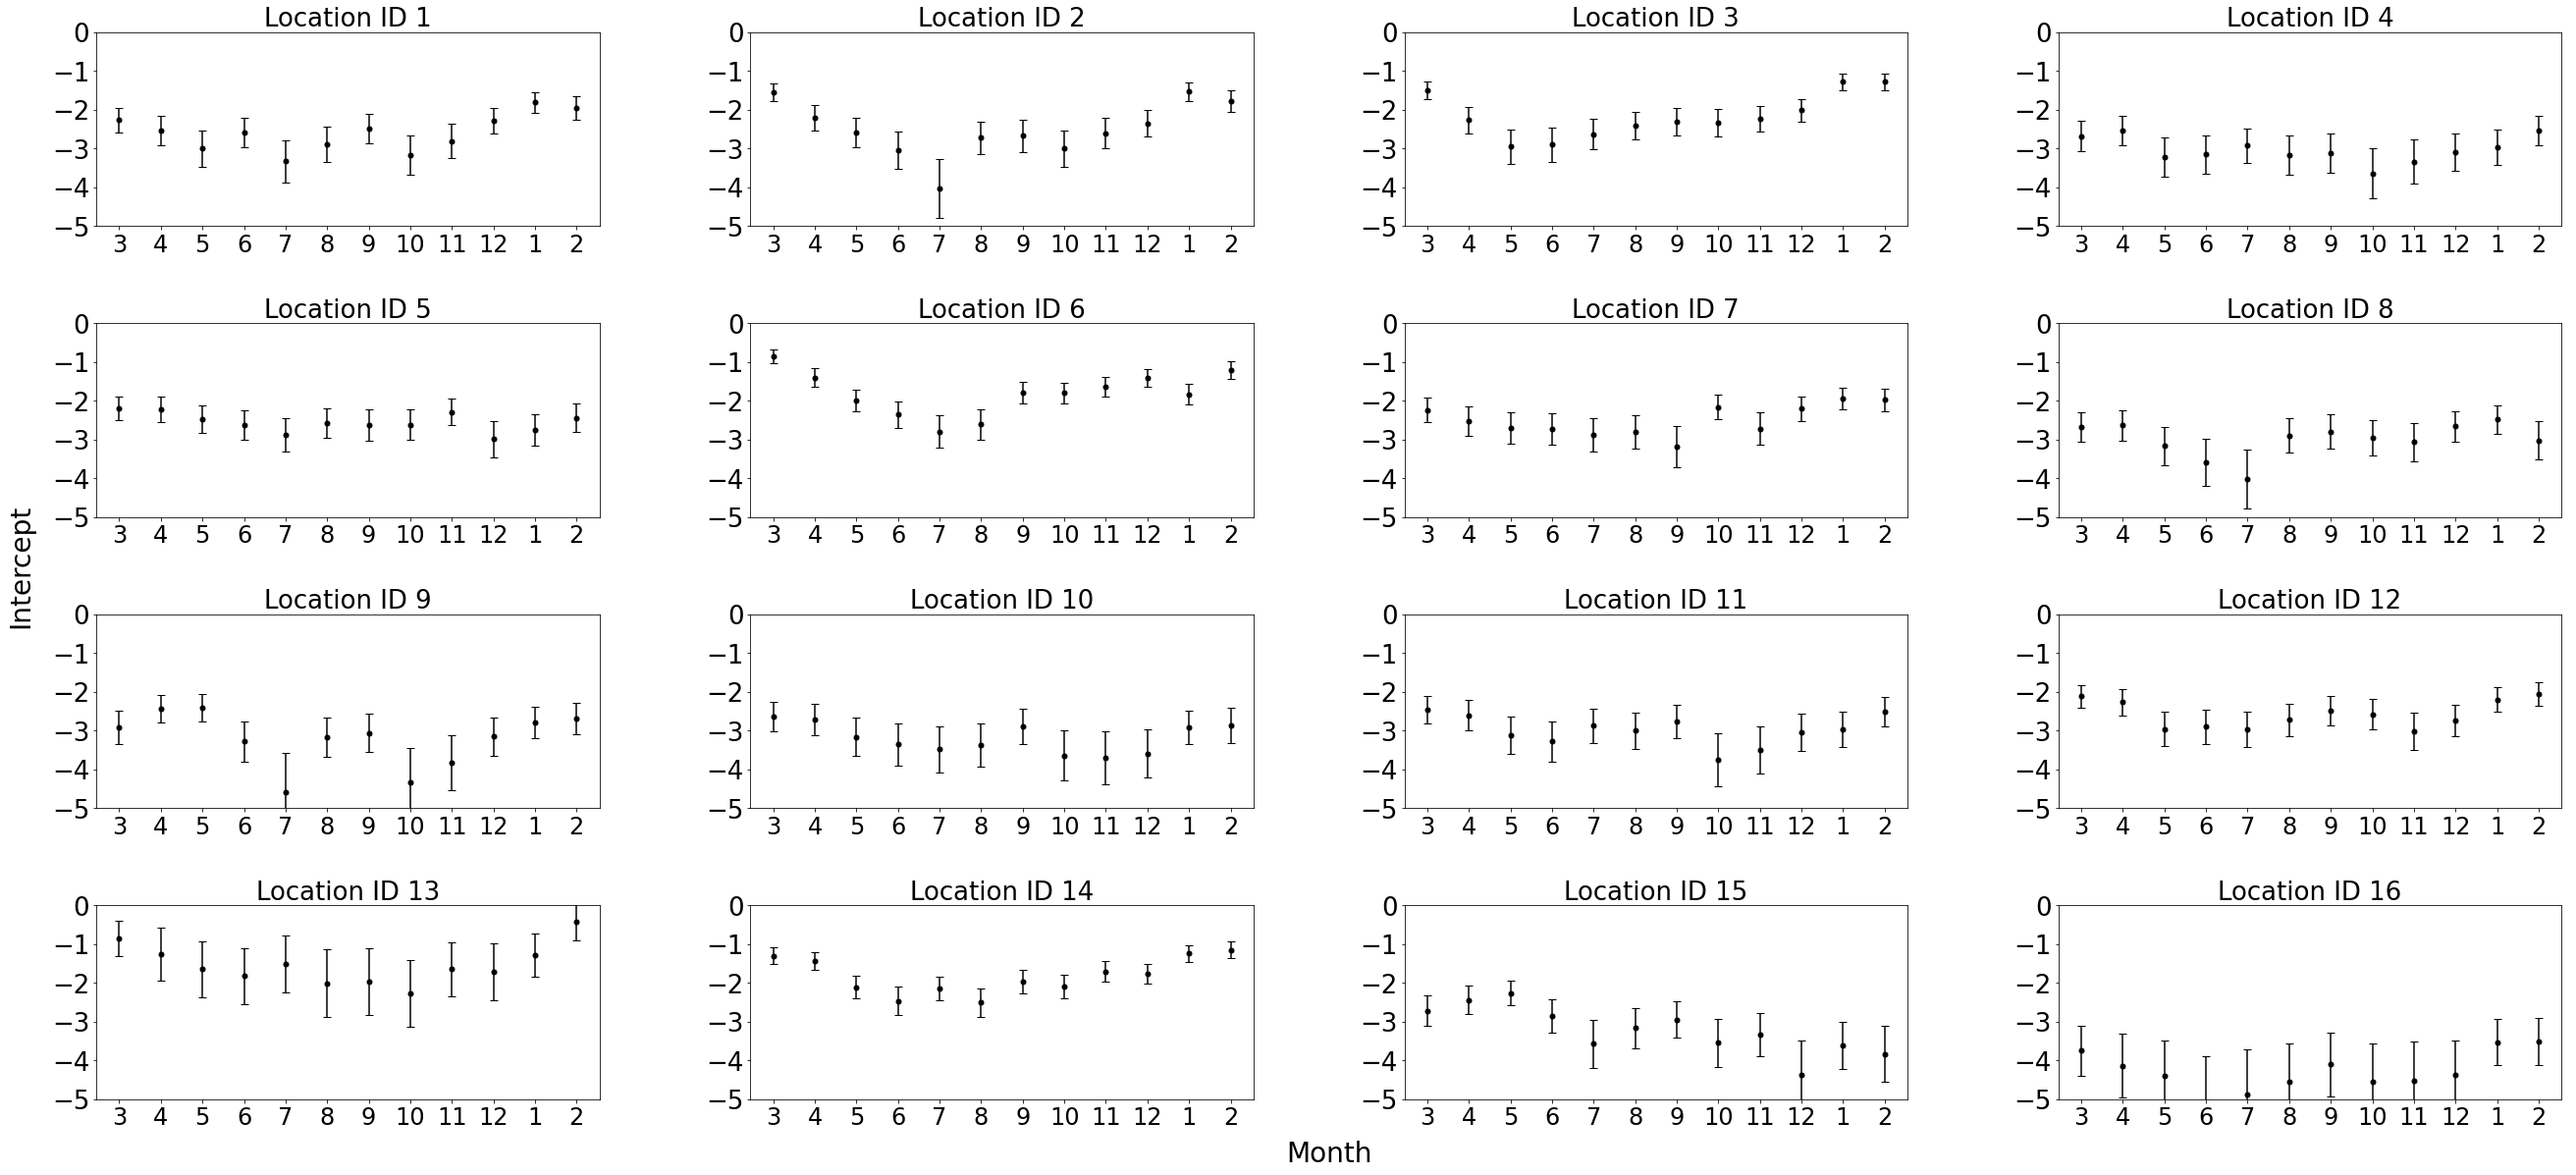

In [12]:
fig = plt.figure(figsize=(45, 20))
fig.subplots_adjust(hspace = 0.5, wspace=.3)

for i in range(0,16):
    plt.subplot(4,4,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =intercepts_null_model[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef_null_model)
    y_error = standard_error_coef*2
    y_error = y_error[i]
    
    #prob = np.exp(y)/(1+np.exp(y))
    

    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=26)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Intercept',fontsize=26)
    plt.ylim(-5,0)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['3','4','5','6','7','8','9','10','11','12','1','2'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 26)

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("Intercept",fontsize = 28,labelpad=40)

plt.savefig('Loc_intercepts_only_model2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

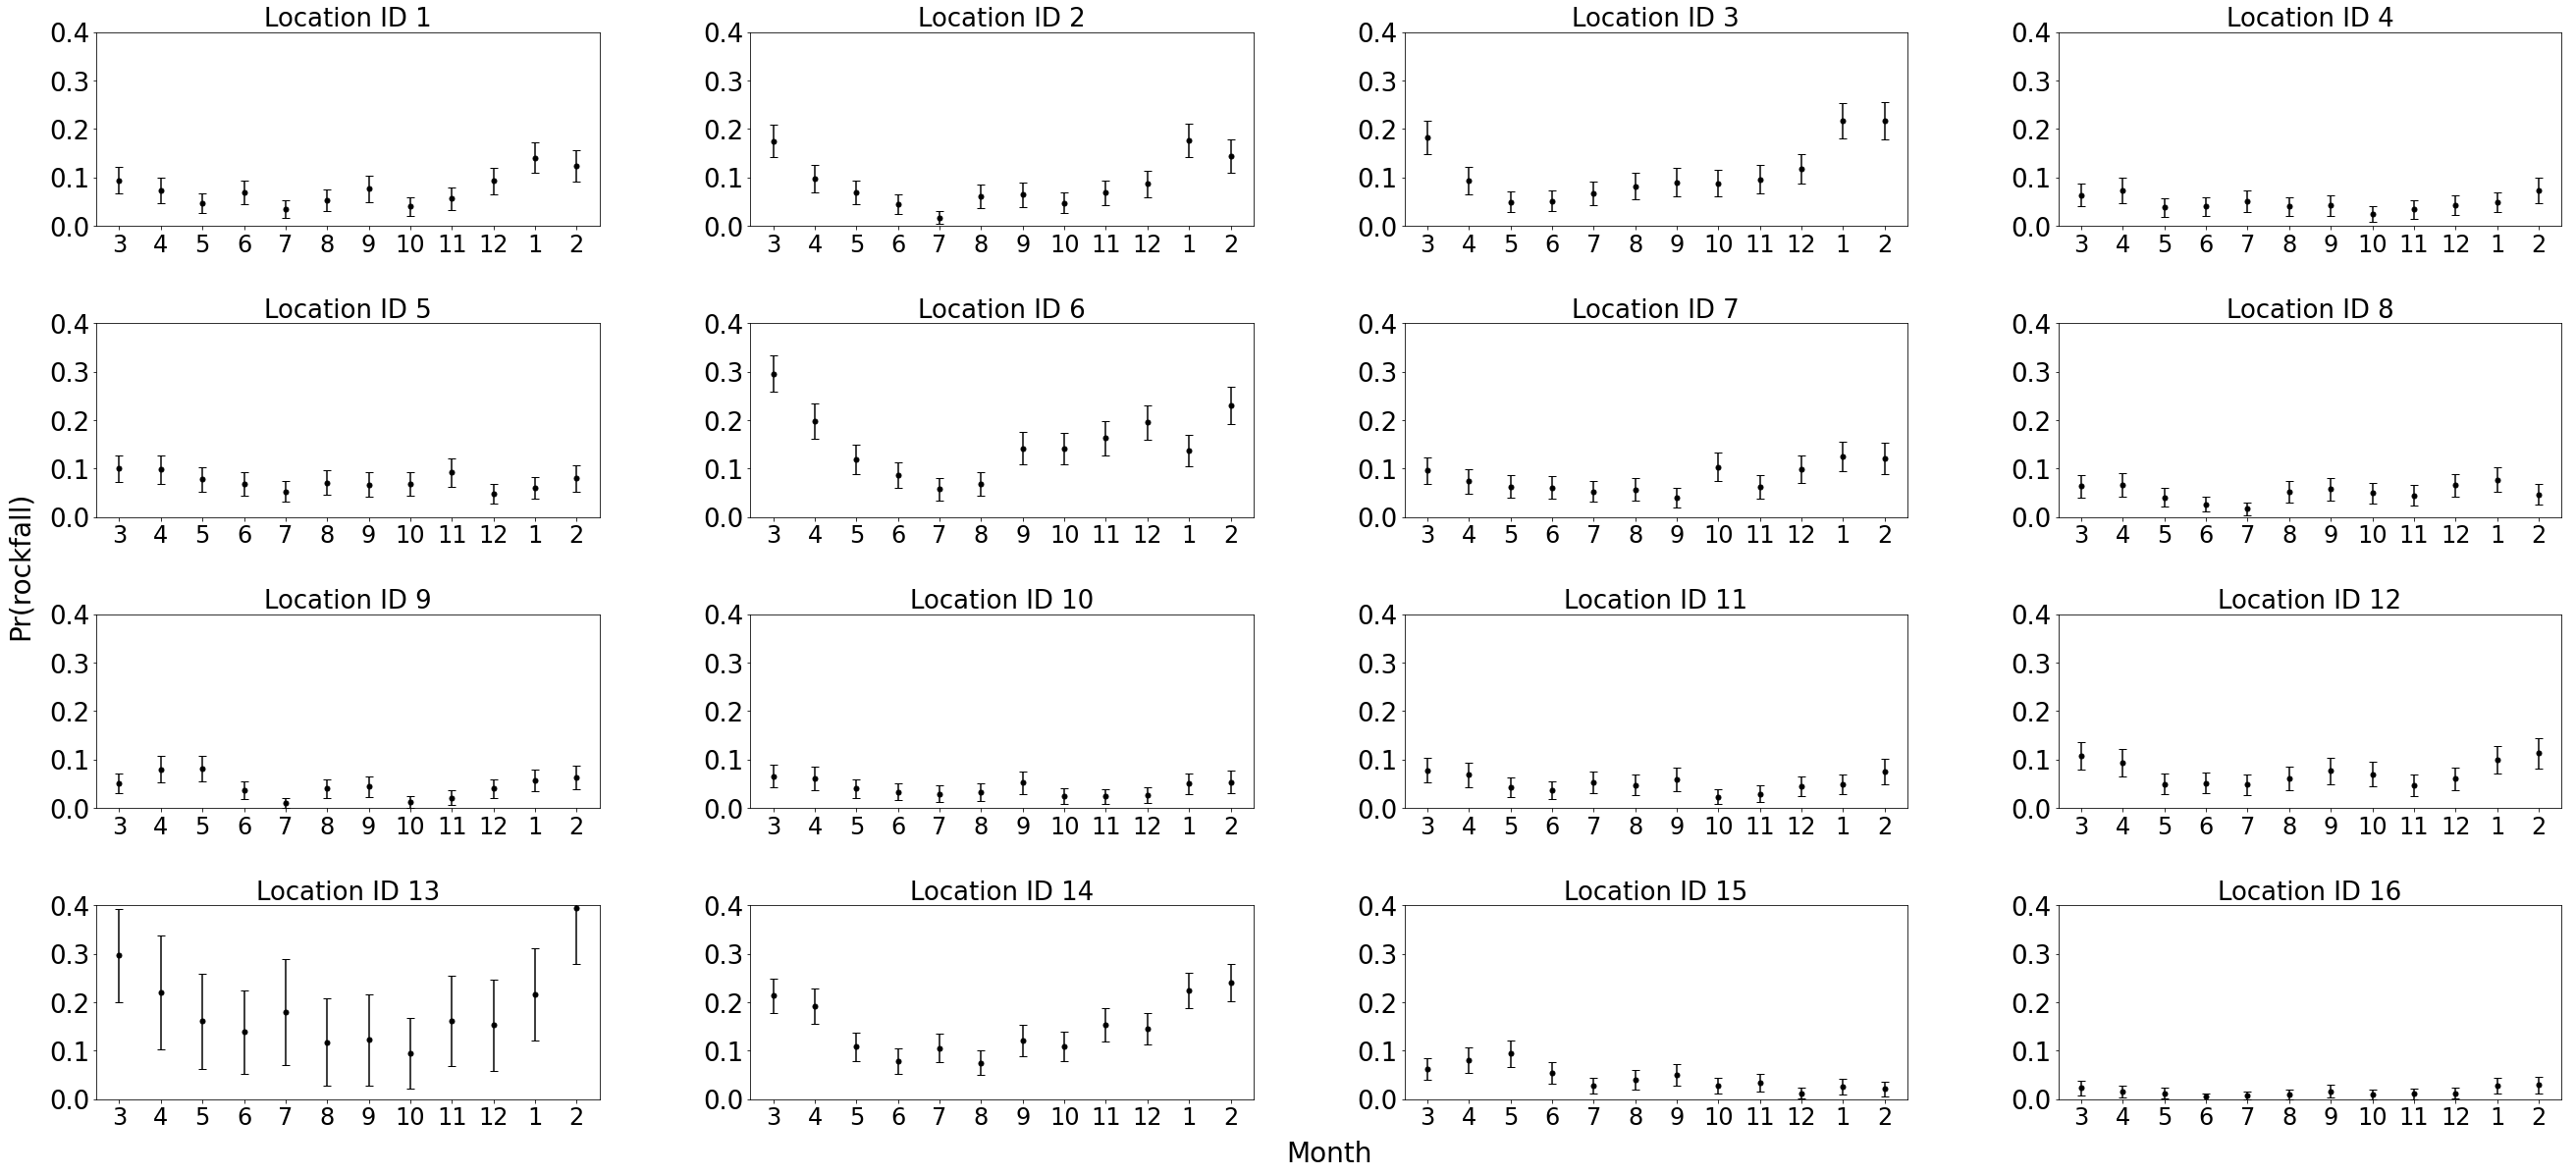

In [13]:
fig = plt.figure(figsize=(45, 20))
fig.subplots_adjust(hspace = 0.5, wspace=.3)


for i in range(0,16):
    plt.subplot(4,4,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =intercepts_null_model[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef_null_model)
    y_error = standard_error_coef*2
    y_error = y_error[i]
    

    prob = np.exp(y)/(1+np.exp(y))
    y_error_prob = y_error*prob*(1-prob)

    plt.errorbar(x, prob, yerr = y_error_prob,fmt='o',markersize=5,capsize=4, color = 'k')
    
   
    plt.yticks(fontsize=26)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Pr(rockfall)',fontsize=26)
    plt.ylim(0,0.4)
    plt.yticks([0.0,0.1,0.2,0.3,0.4])
    #plt.axhline(y = 0, linestyle = 'dotted')

 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['3','4','5','6','7','8','9','10','11','12','1','2'],fontsize=24)
    plt.title("Location ID " + str(i+1),fontsize = 26)
    

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("Pr(rockfall)",fontsize = 28,labelpad=40)

plt.savefig('Prob_loc_intercepts_only_model.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

### Daily temperature for each month for Vestland, ignore locations

In [14]:
intercepts_Vestland = []
slope_Vestland = []
standard_error_coef_Vestland = []
standard_error_slope_Vestland = []


for k in Months:
    mean_daily_temp = k['Mean_daily_temp'].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_Vestland.append(log_reg.params[1])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland.append(log_reg.bse[1])

Optimization terminated successfully.
         Current function value: 0.364557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312890
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.180187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.209299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.248712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.221716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.241944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.259893
  

In [15]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Rockfall   No. Observations:                 6321
Model:                          Logit   Df Residuals:                     6319
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Aug 2021   Pseudo R-squ.:                 0.05235
Time:                        18:47:59   Log-Likelihood:                -2168.4
converged:                       True   LL-Null:                       -2288.2
Covariance Type:            nonrobust   LLR p-value:                 4.860e-54
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8861      0.040    -47.385      0.000      -1.964      -1.808
x1             0.1435      0.010     14.099      0.000       0.124       0.163
==============================================================================
"""

Text(0.5, 1.0, 'Vestland ')

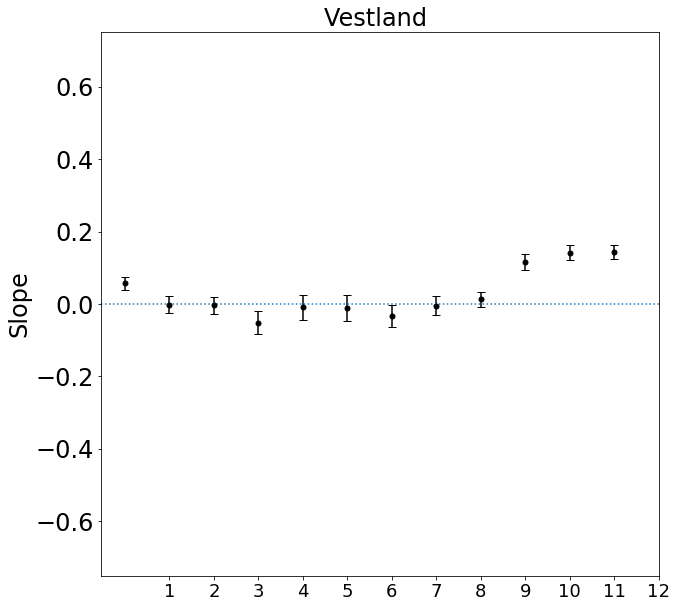

In [16]:
#Vestland
x_Vestland = np.arange(0,12)

y_Vestland = slope_Vestland
standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
y_error_vestland =  standard_error_slope_Vestland*2
y_error_vestland = y_error_vestland


fig = plt.figure(figsize=(10, 10))
plt.errorbar(x_Vestland , y_Vestland, yerr = y_error_vestland,fmt='o',markersize=5,capsize=4, color = 'k')


plt.yticks(fontsize=24)
#plt.xlabel('Month',fontsize=24)
plt.ylabel('Slope',fontsize=24)
plt.ylim(-0.75,0.75)
plt.axhline(y = 0, linestyle = 'dotted')
 

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],fontsize=18)

plt.title("Vestland ",fontsize = 24)

### Daily temperature for each season

In [17]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]


In [18]:
intercepts_seasons = []
slope_seasons = []
standard_error_coef_seasons = []
standard_error_slope_seasons = []

for i in Locations:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    
    # rockfall climate, daily temp

    # spring
    march = i[month== 3]
    april = i[month== 4]
    may = i[month== 5]

    spring = [march, april, may]
    spring = pd.concat(spring)


    # summer 
    jun = i[month == 6]
    jul = i[month == 7]
    aug = i[month == 8]

    summer = [jun, jul, aug]
    summer = pd.concat(summer)


    # autumn
    sep = i[month == 9]
    okt = i[month == 10]
    nov = i[month == 11]

    autumn = [sep, okt, nov]
    autumn = pd.concat(autumn)

    # winter
    dec = i[month == 12]
    jan = i[month == 1]
    feb = i[month == 2]
    
    winter = [dec, jan, feb]
    winter = pd.concat(winter)
    
   
    Seasons = [spring,summer,autumn,winter]
    
    for k in Seasons:
            mean_daily_temp = k['Mean_daily_temp'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k.append(log_reg.params[1])
    
            standard_error_coef_k.append(log_reg.bse[0])
            standard_error_slope_k.append(log_reg.bse[1])

    intercepts_seasons.append(intercepts_k)
    slope_seasons.append(slope_k)
    standard_error_coef_seasons.append(standard_error_coef_k)
    standard_error_slope_seasons.append(standard_error_slope_k)
            
            
            

<ipython-input-18-6e56025717b7>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  march = i[month== 3]
<ipython-input-18-6e56025717b7>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  april = i[month== 4]
<ipython-input-18-6e56025717b7>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  may = i[month== 5]
<ipython-input-18-6e56025717b7>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jun = i[month == 6]
<ipython-input-18-6e56025717b7>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jul = i[month == 7]
<ipython-input-18-6e56025717b7>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aug = i[month == 8]
<ipython-input-18-6e56025717b7>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sep = i[month == 9]
<ipython-input-18-6e56025717b7>:35: UserWarning: Boolean Seri

Optimization terminated successfully.
         Current function value: 0.252666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.199058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.220300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.365834
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.355148
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.166867
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.222533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.350485
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.245324
  

### Daily temperature for each month

In [19]:
intercepts = []
slope = []
standard_error_coef = []
standard_error_slope = []
#probability_rockfall = []
p_values = []
significance_slope = []
significance_coef = []
confidence_interval = []

log_likelihood = []

for i in Locations:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    probability_rockfall_k = []
    p_values_k = []
    significance_k = []
    significance_coef_k = []
    confidence_interval_k = []
    
    log_likelihood_k = []
    
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k['Mean_daily_temp'].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k.append(log_reg.params[1])
    
            standard_error_coef_k.append(log_reg.bse[0])
            standard_error_slope_k.append(log_reg.bse[1])
            
            prob_rockfall =  np.exp(log_reg.bse[0])/(1+np.exp(log_reg.bse[0]))
            probability_rockfall_k.append(prob_rockfall)
            p_values_k.append(log_reg.pvalues)
            
            confidence_interval_k.append(log_reg.conf_int(alpha=0.05))
            
            if log_reg.pvalues[1] > 0.05:
                significance_k.append('no')
            if log_reg.pvalues[1] < 0.05:
                significance_k.append('yes')
                
                        
            if log_reg.pvalues[0] > 0.05:
                significance_coef_k.append('no')
            if log_reg.pvalues[0] < 0.05:
                significance_coef_k.append('yes')
                
            log_likelihood_k.append(log_reg.llr)   
                

    intercepts.append(intercepts_k)
    slope.append(slope_k)
    standard_error_coef.append(standard_error_coef_k)
    standard_error_slope.append(standard_error_slope_k)
    #probability_rockfall.append(probability_rockfall_k)
    p_values.append(p_values_k)     
    significance_slope.append(significance_k)      
    significance_coef.append(significance_coef_k)     
    confidence_interval.append(confidence_interval_k)        
    log_likelihood.append(log_likelihood_k)

<ipython-input-19-326ff8ac1b80>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-19-326ff8ac1b80>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]


Optimization terminated successfully.
         Current function value: 0.309895
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.248370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.188829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.242721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.136693
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.258421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.167868
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.216292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309835
  

Optimization terminated successfully.
         Current function value: 0.168487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.123269
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.086462
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.197416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.178738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.228644
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.249525
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.183241
  

In [20]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Rockfall   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Aug 2021   Pseudo R-squ.:               4.726e-05
Time:                        18:48:08   Log-Likelihood:                -49.802
converged:                       True   LL-Null:                       -49.804
Covariance Type:            nonrobust   LLR p-value:                    0.9453
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5199      0.324    -10.872      0.000      -4.155      -2.885
x1             0.0065      0.095      0.069      0.945      -0.180       0.193
==============================================================================
"""

In [21]:
log_reg.llr

0.004707125655386335

### Daily temperature for each month and location

In [22]:
intercepts_month = []
slope_month = []
standard_error_coef_month = []
standard_error_slope_month = []
p_values_month = []
significance = []

Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

for i in Months:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    p_values_k = []
    significance_k = []
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        print(k) 
        mean_daily_temp = k['Mean_daily_temp'].values
        mean_daily_temp.reshape(-1, 1)

        y = k['Rockfall']

        #centering the model
        #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
        log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
        intercepts_k.append(log_reg.params[0])
        slope_k.append(log_reg.params[1])
    
        standard_error_coef_k.append(log_reg.bse[0])
        standard_error_slope_k.append(log_reg.bse[1])
        
        p_values_k.append(log_reg.pvalues)
        
        if log_reg.pvalues[1] > 0.05:
            significance_k.append('no')
        if log_reg.pvalues[1] < 0.05:
            significance_k.append('yes')

    intercepts_month.append(intercepts_k)
    slope_month.append(slope_k)
    standard_error_coef_month.append(standard_error_coef_k)
    standard_error_slope_month.append(standard_error_slope_k)
    p_values_month.append(p_values_k)       
    significance.append(significance_k)    
            

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
82            428 1991-03-05         1             2.58        0.00         0   
98            432 1991-03-09         1             6.90        2.10         0   
121           433 1991-03-10         1             7.24        1.76         0   
139           437 1991-03-14         1             5.40       14.23         0   
161           451 1991-03-28         1             6.93        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74864       10677 2019-03-27         1             3.92       11.96         0   
74879       10678 2019-03-28         1             7.22        3.94         0   
74906       10679 2019-03-29         1             8.42       15.32         0   
74915       10680 2019-03-30         1             5.68       36.80         0   
74937       10681 2019-03-31         1             1.88       14.31         0   

       Temp*Prec  dummy_var

Optimization terminated successfully.
         Current function value: 0.222863
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
96            428 1991-03-05        11             1.96       10.04         0   
102           432 1991-03-09        11             6.57        3.33         0   
114           433 1991-03-10        11             5.85        5.72         0   
137           437 1991-03-14        11             4.34       32.30         0   
150           451 1991-03-28        11             4.94        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74871       10677 2019-03-27        11             4.07       11.89         0   
74887       10678 2019-03-28        11             6.64        4.13         0   
74902       10679 2019-03-29        11             7.14        2.08         0   
74910       10680 2019-03-30        11             6.33       14.12         0   
74938  

[408 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.258477
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
188           458 1991-04-04         5             1.84        5.28         0   
201           470 1991-04-16         5             0.53        0.00         0   
218           472 1991-04-18         5            -3.45        0.00         0   
237           480 1991-04-26         5             0.84        0.00         0   
1137          825 1992-04-05         5            -1.65        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75335       10707 2019-04-26         5             9.11        0.77         0   
75351       10708 2019-04-27         5             9.28        0.11         0   
75365       10709 2019-04-28         5             9.43        0.67         0   
75375       10710 2019-04-29         5             8.76        0.

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
194           458 1991-04-04        13         4.170000       10.21         0   
210           470 1991-04-16        13         3.770000        4.09         0   
227           472 1991-04-18        13         1.190000        0.00         0   
234           480 1991-04-26        13         5.130000        0.00         0   
1130          825 1992-04-05        13         1.220000        0.00         0   
1142          826 1992-04-06        13         1.990000        2.68         0   
1161          832 1992-04-12        13         6.010000        8.51         0   
1184          841 1992-04-21        13         2.340000        0.00         0   
1198          845 1992-04-25        13         4.690000        3.36         0   
1219          847 1992-04-27        13         6.690000       15.67         0   
1225          848 1992-04-28        13         6.050000       17.14         0   
1246          849 1992-04-29

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
196           458 1991-04-04        16             4.90        5.37         0   
200           470 1991-04-16        16             4.14        4.69         0   
223           472 1991-04-18        16             1.84        0.00         0   
240           480 1991-04-26        16             5.62        0.00         0   
1132          825 1992-04-05        16             1.79        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75344       10707 2019-04-26        16            13.37        0.71         0   
75345       10708 2019-04-27        16            10.86        5.05         0   
75368       10709 2019-04-28        16             8.80       16.45         0   
75384       10710 2019-04-29        16             8.92        2.91         0   
75396       10711 2019-04-30        16            11.33        0.10         0   

       Temp*Prec  dummy_var

Optimization terminated successfully.
         Current function value: 0.168986
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
261           497 1991-05-13        11             6.69        4.64         0   
1269          852 1992-05-02        11             5.92        5.10         0   
1284          863 1992-05-13        11             6.33        8.60         0   
1294          878 1992-05-28        11            16.25        0.00         0   
1304          879 1992-05-29        11            17.65        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75816       10738 2019-05-27        11             8.71        0.00         0   
75846       10739 2019-05-28        11             7.61        0.00         0   
75847       10740 2019-05-29        11             5.31        2.75         0   
75875       10741 2019-05-30        11             6.70       10.31         0   
75891  

Optimization terminated successfully.
         Current function value: 0.242721
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
274           518 1991-06-03         2             1.46        0.00         0   
292           522 1991-06-07         2             0.76        7.11         0   
307           533 1991-06-18         2             6.98        2.27         0   
325           536 1991-06-21         2             4.56        3.00         0   
332           539 1991-06-24         2             6.76        9.86         0   
...           ...        ...       ...              ...         ...       ...   
76277       10768 2019-06-26         2             8.86        1.30         0   
76297       10769 2019-06-27         2             6.16        1.46         0   
76315       10770 2019-06-28         2             6.17        0.00         0   
76328       10771 2019-06-29         2             8.08        0.00         0   
76341  

[415 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.149034
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
278           518 1991-06-03        12         5.920000        1.46         0   
285           522 1991-06-07        12         5.130000       26.53         0   
300           533 1991-06-18        12        10.030000        3.06         0   
326           536 1991-06-21        12         8.360000        6.60         0   
342           539 1991-06-24        12         9.850000       13.50         0   
...           ...        ...       ...              ...         ...       ...   
76291       10769 2019-06-27        12        11.850000        1.18         0   
76312       10770 2019-06-28        12        13.600000        0.08         0   
76326       10771 2019-06-29        12        15.310000        0.00         0   
76340        1884 2019-06-30        12        15.043502        4.

[414 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.207482
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
359           552 1991-07-07         8            18.43        0.00         0   
374           554 1991-07-09         8            19.98        0.00         0   
383           565 1991-07-20         8            11.68        5.37         0   
397           566 1991-07-21         8            12.36        1.43         0   
417           567 1991-07-22         8            13.19        2.08         0   
...           ...        ...       ...              ...         ...       ...   
76464       10780 2019-07-08         8            10.48        3.89         0   
76489       10781 2019-07-09         8            11.60        0.00         0   
76498       10782 2019-07-10         8            12.19        0.39         0   
76520       10783 2019-07-11         8            15.35        0.

[402 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.205025
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
447           578 1991-08-02         2        16.270000        0.00         0   
459           580 1991-08-04         2        15.790000        1.97         0   
478           584 1991-08-08         2        10.180000        0.00         0   
501           591 1991-08-15         2         7.880000        5.10         0   
506           596 1991-08-20         2         8.680000        1.10         0   
...           ...        ...       ...              ...         ...       ...   
71522       10466 2018-08-28         2         6.660000        4.50         0   
71531        6710 2018-08-28         2         7.544326        4.13         1   
71540       10467 2018-08-29         2         9.060000        0.00         0   
71558       10468 2018-08-30         2         7.060000        9.

65706   75.619699               1  
Optimization terminated successfully.
         Current function value: 0.355385
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
448           578 1991-08-02        14        17.090000        0.00         0   
460           580 1991-08-04        14        15.390000        0.00         0   
487           584 1991-08-08        14        10.240000        2.57         0   
499           591 1991-08-15        14         8.830000        4.10         0   
505           596 1991-08-20        14         8.750000        2.06         0   
...           ...        ...       ...              ...         ...       ...   
71559       10468 2018-08-30        14         8.460000       11.74         0   
71571       10469 2018-08-31        14         7.830000        0.00         0   
76539         497 2019-08-01        14        11.544767        0.31         1   
76545         704 2019-08-09        14        13.926

[379 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.178538
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
537           608 1991-09-01        10         12.54000        0.00         0   
557           609 1991-09-02        10         13.22000        0.00         0   
571           612 1991-09-05        10          7.68000       16.38         0   
586           613 1991-09-06        10          5.67000        0.43         0   
607           623 1991-09-16        10          8.61000       20.20         0   
...           ...        ...       ...              ...         ...       ...   
72004       10496 2018-09-27        10          6.36000       31.94         0   
72015        2352 2018-09-27        10          7.97398       22.56         1   
72021       10497 2018-09-28        10          3.53000       31.34         0   
72036       10498 2018-09-29        10          3.48000       23.

[411 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.248102
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
616           640 1991-10-03         6         0.740000        0.18         0   
645           641 1991-10-04         6        -0.110000        5.97         0   
658           649 1991-10-12         6         4.010000        0.00         0   
665           657 1991-10-20         6        -1.340000        0.00         0   
683           658 1991-10-21         6        -1.390000        1.42         0   
...           ...        ...       ...              ...         ...       ...   
72514        4630 2018-10-29         6        -6.816571        0.00         1   
72526       10529 2018-10-30         6        -6.150000        0.00         0   
72546       10530 2018-10-31         6        -0.460000        0.43         0   
76555        5332 2019-10-04         6         2.427287        1.

[430 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.340464
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
619           640 1991-10-03        15            -0.97        5.75         0   
642           641 1991-10-04        15             0.75       16.12         0   
663           649 1991-10-12        15             6.63        0.00         0   
678           657 1991-10-20        15            -4.83        0.00         0   
696           658 1991-10-21        15            -5.05        2.46         0   
...           ...        ...       ...              ...         ...       ...   
72481       10526 2018-10-27        15            -4.31        0.00         0   
72498       10527 2018-10-28        15            -6.84        0.20         0   
72517       10528 2018-10-29        15            -8.23        0.00         0   
72528       10529 2018-10-30        15            -7.09        1.

[437 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.424290
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
712           674 1991-11-06         7         0.790000        0.00         0   
727           687 1991-11-19         7        -6.200000        0.00         0   
735           688 1991-11-20         7        -7.960000        0.00         0   
1595         1050 1992-11-16         7        -5.620000        0.00         0   
1598         1052 1992-11-18         7        -5.050000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
72960       10557 2018-11-27         7        -6.090000        0.00         0   
72972       10558 2018-11-28         7        -5.810000        0.00         0   
72984       10559 2018-11-29         7         1.530000        1.00         0   
72999       10560 2018-11-30         7         5.700000        6.

[370 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.059624
         Iterations 9
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
763           700 1991-12-02         1         4.320000        5.04         0   
775           703 1991-12-05         1         4.320000        7.16         0   
791           704 1991-12-06         1         2.430000        0.10         0   
809           716 1991-12-18         1         5.370000       45.61         0   
823           720 1991-12-22         1        -0.860000        1.41         0   
...           ...        ...       ...              ...         ...       ...   
73471       10590 2018-12-30         1         4.120000       17.48         0   
73488       10591 2018-12-31         1         4.420000       14.35         0   
76571        7115 2019-12-04         1         5.993017       17.14         1   
76574        7142 2019-12-05         1         5.772472       33.

[427 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.228644
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
758           700 1991-12-02         9             4.57        0.10         0   
772           703 1991-12-05         9             3.98        0.00         0   
782           704 1991-12-06         9             0.89        0.00         0   
804           716 1991-12-18         9             5.35       40.00         0   
826           720 1991-12-22         9             0.00        0.34         0   
...           ...        ...       ...              ...         ...       ...   
73425       10587 2018-12-27         9             5.48       29.62         0   
73434       10588 2018-12-28         9             5.69       11.84         0   
73458       10589 2018-12-29         9             4.88        7.56         0   
73475       10590 2018-12-30         9             3.68        9.

Optimization terminated successfully.
         Current function value: 0.481126
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
0             367 1991-01-03         4            -0.96       22.44         0   
891           733 1992-01-04         4            -0.02       16.72         0   
904           734 1992-01-05         4            -4.33       14.41         0   
914           737 1992-01-08         4             0.35       12.13         0   
930           738 1992-01-09         4            -3.69        8.08         0   
...           ...        ...       ...              ...         ...       ...   
73900       10618 2019-01-27         4            -5.14        0.00         0   
73914       10619 2019-01-28         4            -7.57        0.00         0   
73929       10620 2019-01-29         4            -8.54        1.77         0   
73943       10621 2019-01-30         4            -4.29        0.58         0   
73969  

[527 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.428601
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
1             367 1991-01-03        15            -3.65       34.74         0   
885           733 1992-01-04        15            -3.13       14.56         0   
896           734 1992-01-05        15            -7.01       11.76         0   
915           737 1992-01-08        15            -1.17       17.94         0   
932           738 1992-01-09        15            -5.62        0.00         0   
...           ...        ...       ...              ...         ...       ...   
73905       10618 2019-01-27        15            -9.91        1.38         0   
73919       10619 2019-01-28        15           -10.73        5.91         0   
73933       10620 2019-01-29        15           -11.04        1.28         0   
73950       10621 2019-01-30        15            -7.71        0.

[387 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.183241
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
20            401 1991-02-06         9            -1.31        0.00         0   
34            410 1991-02-15         9            -3.29       15.45         0   
62            414 1991-02-19         9            -2.80        2.96         0   
76            418 1991-02-23         9             2.84       12.40         0   
1022          778 1992-02-18         9            -2.70        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74364       10646 2019-02-24         9             7.29        3.75         0   
74382       10647 2019-02-25         9             5.49        0.00         0   
74394       10648 2019-02-26         9             5.09        6.87         0   
74406       10649 2019-02-27         9             6.24        0.

In [23]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Rockfall   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Aug 2021   Pseudo R-squ.:               4.726e-05
Time:                        18:48:12   Log-Likelihood:                -49.802
converged:                       True   LL-Null:                       -49.804
Covariance Type:            nonrobust   LLR p-value:                    0.9453
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5199      0.324    -10.872      0.000      -4.155      -2.885
x1             0.0065      0.095      0.069      0.945      -0.180       0.193
==============================================================================
"""

In [24]:
significance

[['no',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'no',
  'no',
  'yes',
  'yes',
  'no',
  'no',
  'no',
  'yes',
  'yes',
  'no'],
 ['yes',
  'yes',
  'yes',
  'no',
  'no',
  'yes',
  'no',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'no'],
 ['no',
  'yes',
  'no',
  'yes',
  'yes',
  'yes',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'yes',
  'no'],
 ['yes',
  'yes',
  'no',
  'no',
  'yes',
  'yes',
  'yes',
  'no',
  'yes',
  'no',
  'yes',
  'yes',
  'no',
  'no',
  'yes',
  'no'],
 ['yes',
  'yes',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'yes',
  'no',
  'no',
  'no',
  'no'],
 ['no',
  'yes',
  'no',
  'yes',
  'yes',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'no'],
 ['yes',
  'no',
  'no',
  'no',
  'yes',
  'no',
  'yes',
  'no',
  'no',
  'no',
  'yes',
  'yes',
  'no',
  'yes',
  'yes',
  'no'],
 ['no',
  'no',
  'no',
  'no',
  'no',
  'yes

In [25]:
p_values_month


[[const    3.989729e-23
  x1       1.850731e-01
  dtype: float64,
  const    2.683247e-15
  x1       4.138970e-12
  dtype: float64,
  const    7.874367e-34
  x1       2.360743e-03
  dtype: float64,
  const    4.240183e-38
  x1       1.757179e-03
  dtype: float64,
  const    3.125601e-38
  x1       7.531880e-01
  dtype: float64,
  const    2.072446e-12
  x1       3.292652e-11
  dtype: float64,
  const    6.323911e-46
  x1       2.070140e-01
  dtype: float64,
  const    1.618135e-38
  x1       5.058700e-02
  dtype: float64,
  const    3.921223e-30
  x1       1.725797e-02
  dtype: float64,
  const    1.500655e-32
  x1       1.553678e-04
  dtype: float64,
  const    6.067341e-26
  x1       8.826565e-02
  dtype: float64,
  const    1.329343e-43
  x1       1.601820e-01
  dtype: float64,
  const    0.001426
  x1       0.925949
  dtype: float64,
  const    5.013083e-25
  x1       2.273488e-06
  dtype: float64,
  const    3.057005e-18
  x1       4.906826e-05
  dtype: float64,
  const    6.42192

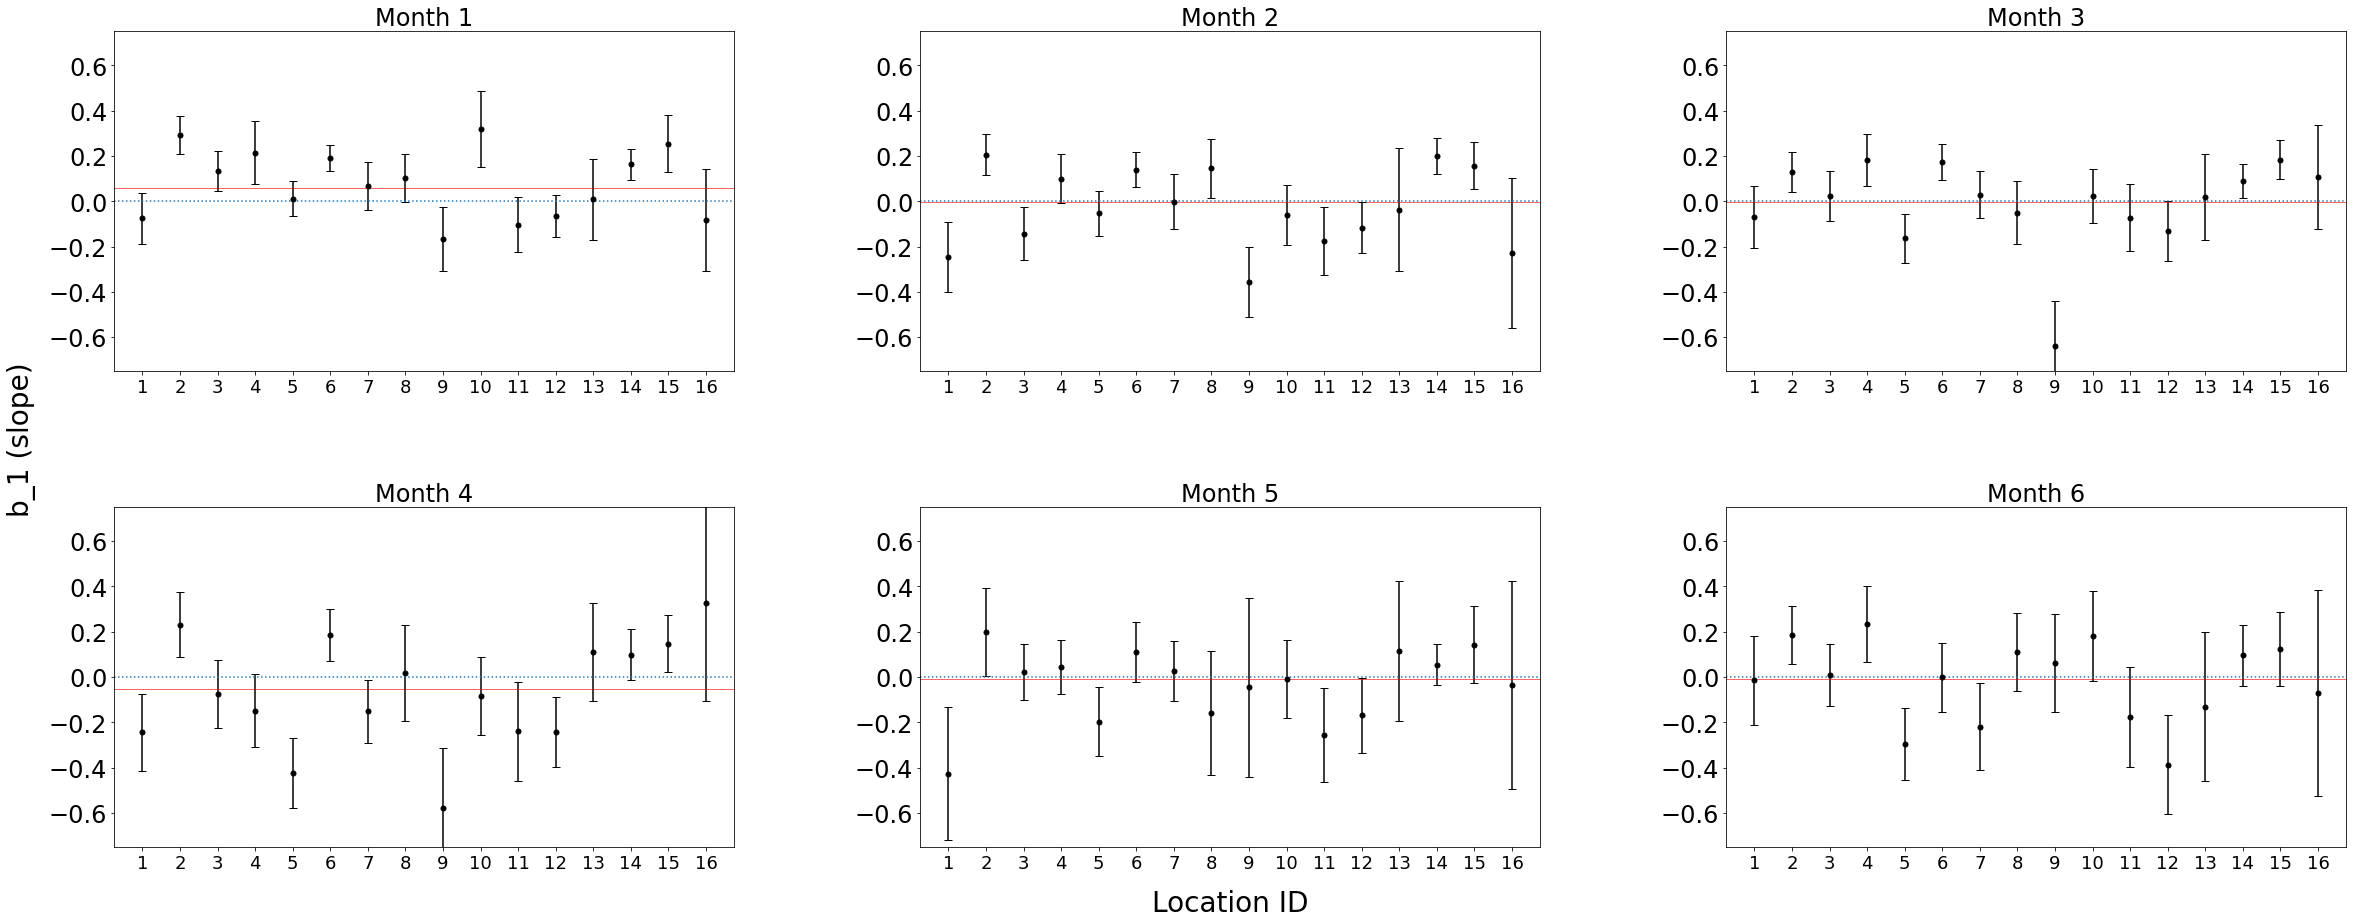

In [26]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,17)

    # coeffisient
    y =slope_month[i]
    

    # Monthly
    standard_error_slope_month = np.array(standard_error_slope_month)
    y_error = standard_error_slope_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    #plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel('b_1 (slope)',fontsize = 28,labelpad=55)

plt.savefig('Month_slope_mean_daily_temp_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

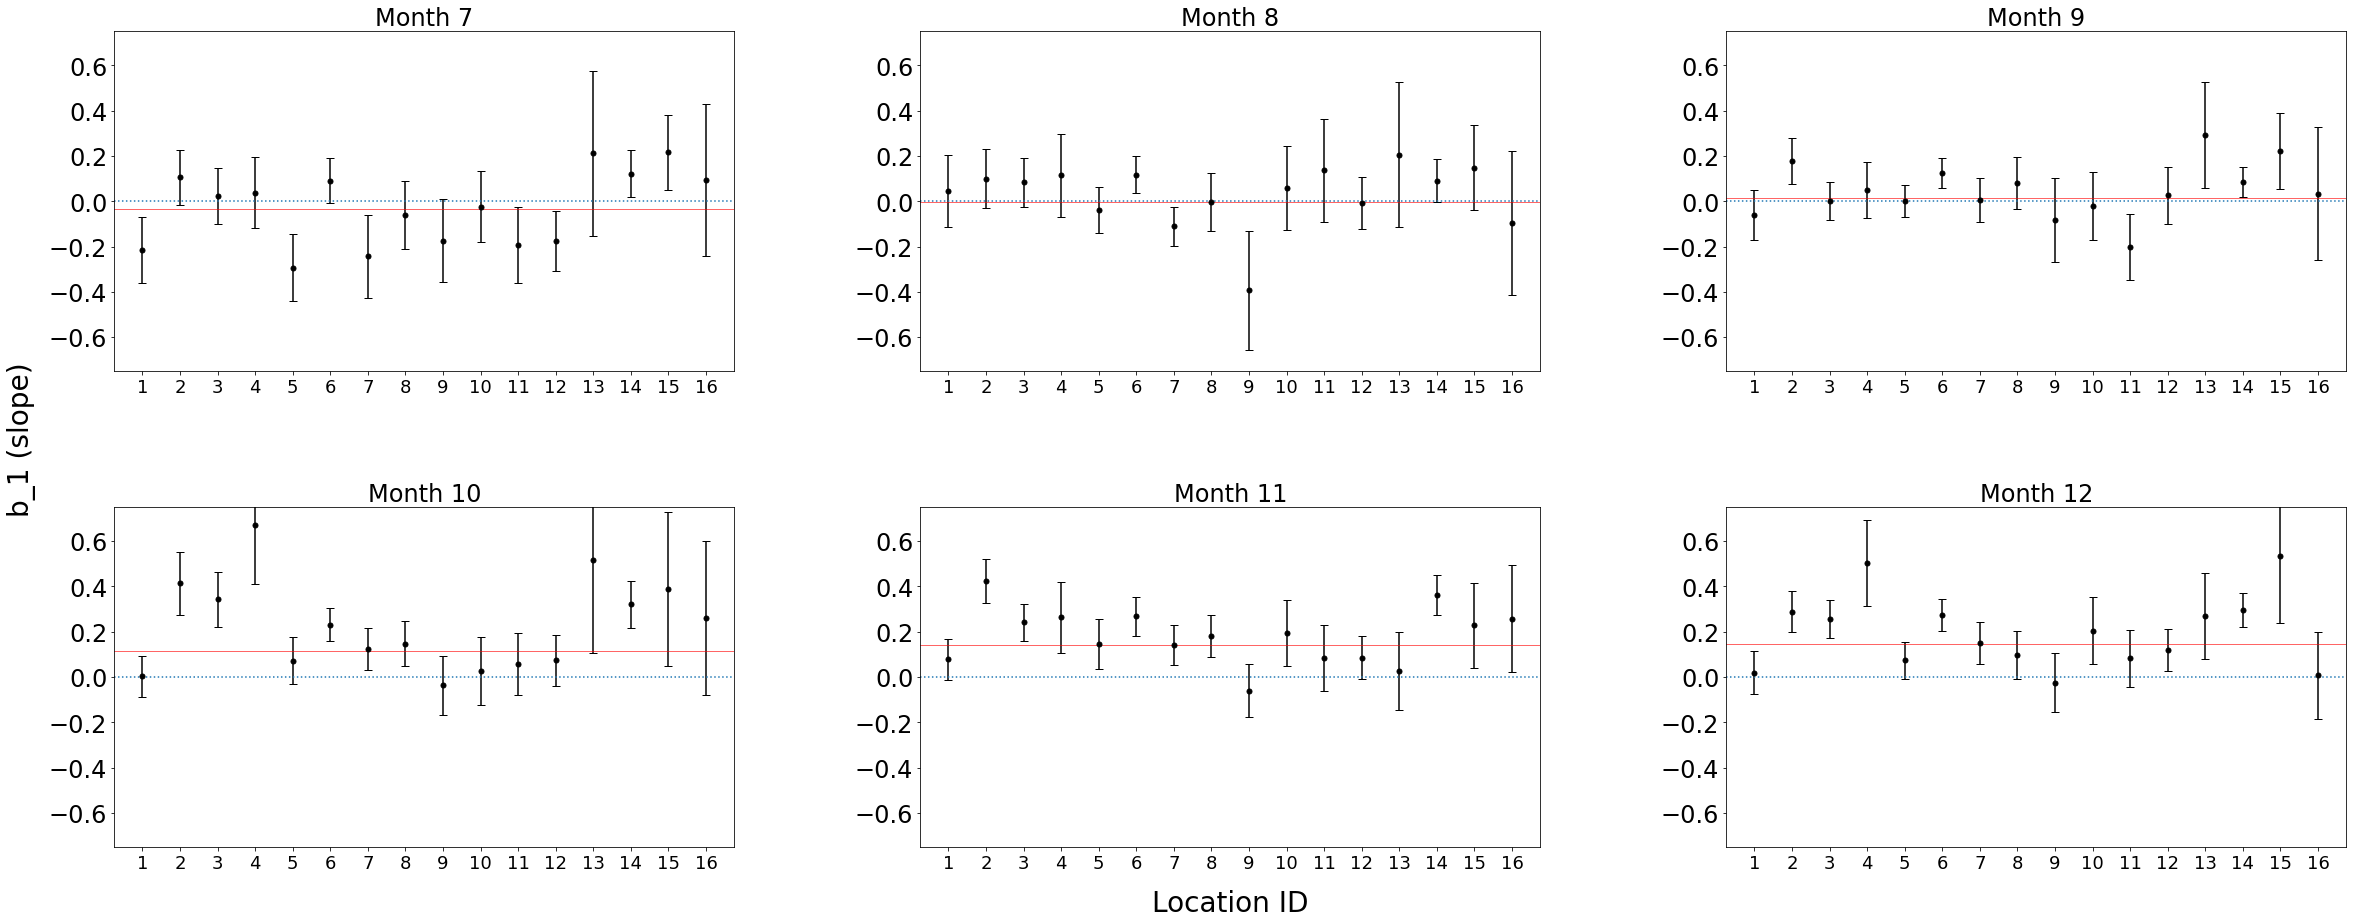

In [27]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,17)

    # coeffisient
    y =slope_month[i]
    

    # Monthly
    standard_error_slope_month = np.array(standard_error_slope_month)
    y_error = standard_error_slope_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    #plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)


plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel('b_1 (slope)',fontsize = 28,labelpad=55)

plt.savefig('Month_slope_mean_daily_temp_2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

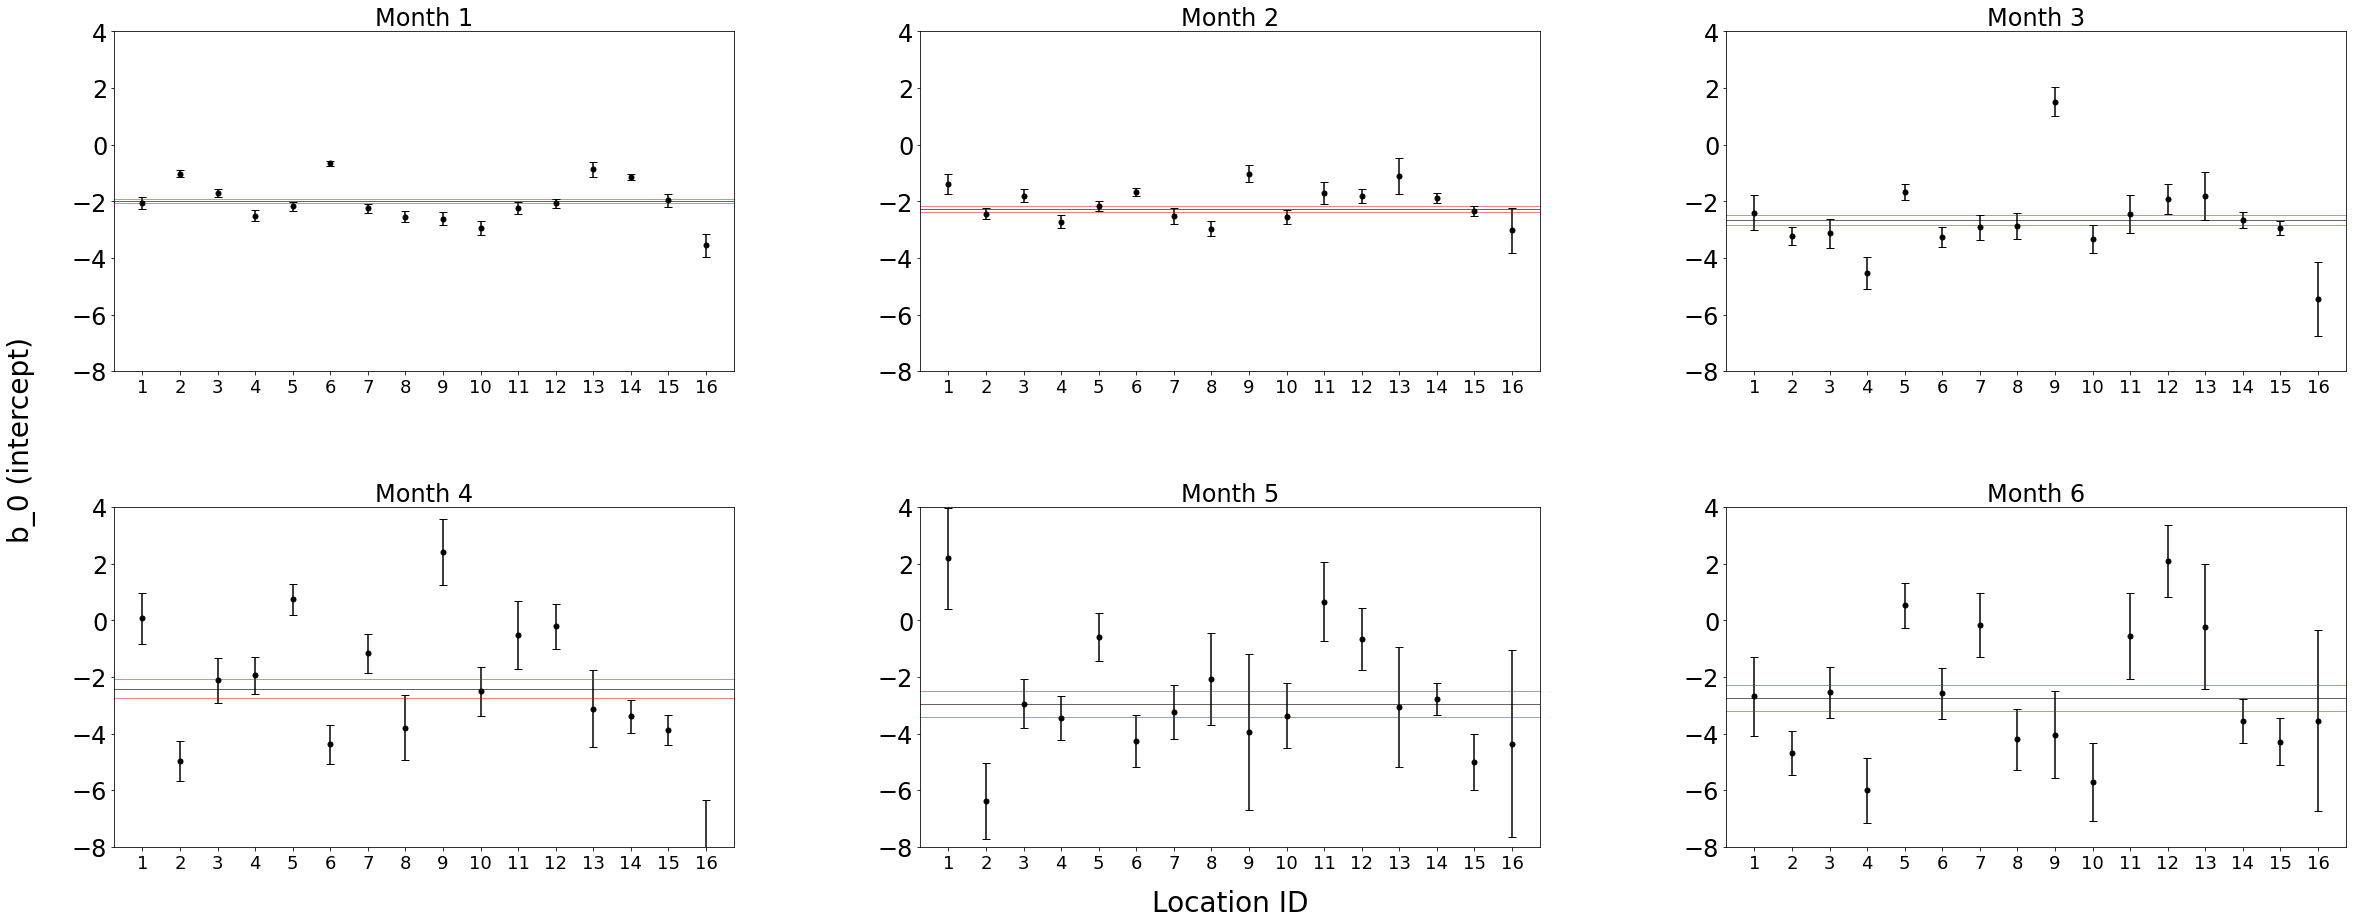

In [28]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,17)

    # coeffisient
    y =intercepts_month[i]
    

    # Monthly
    standard_error_intercepts_month = np.array(standard_error_coef_month)
    y_error = standard_error_coef_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = intercepts_Vestland[i]
    standard_error_coef_Vestland = np.array(standard_error_coef_Vestland)
    y_error_vestland =  standard_error_coef_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'k', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-8,4)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel("b_0 (intercept)",fontsize = 28,labelpad=55)

plt.savefig('Month_intercept_mean_daily_temp_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

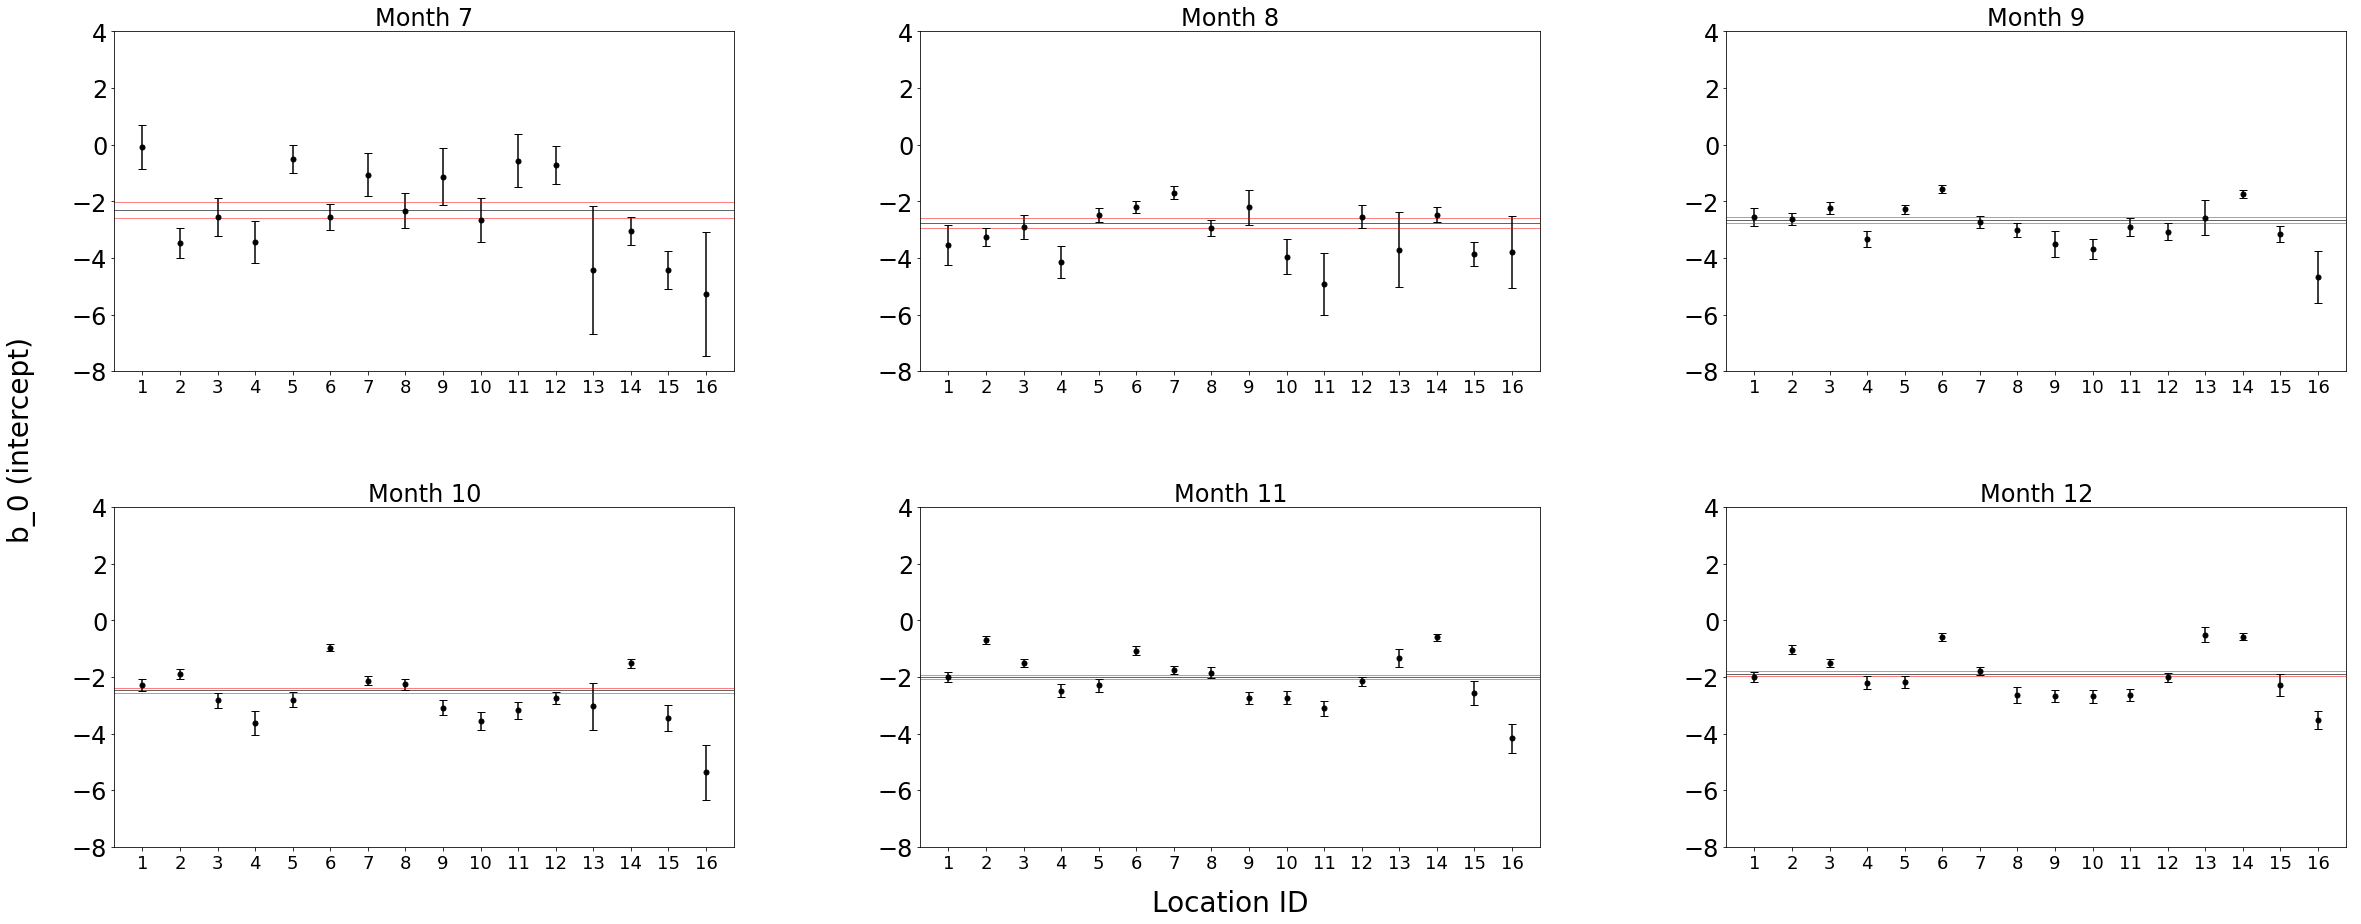

In [29]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,17)

    # coeffisient
    y =intercepts_month[i]
    

    # Monthly
    standard_error_intercepts_month = np.array(standard_error_coef_month)
    y_error = standard_error_coef_month*2
    y_error = y_error[i]
    
    #Vestland
    y_vestland = intercepts_Vestland[i]
    standard_error_coef_Vestland = np.array(standard_error_coef_Vestland)
    y_error_vestland =  standard_error_coef_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'k', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    
    
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Location ID',fontsize=24)
    #plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-8,4)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],fontsize=18)

    plt.title("Month " + str(i+1),fontsize = 24)

    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Location ID",fontsize = 28,labelpad=25)
plt.ylabel("b_0 (intercept)",fontsize = 28,labelpad=55)

plt.savefig('Month_intercept_mean_daily_temp_2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

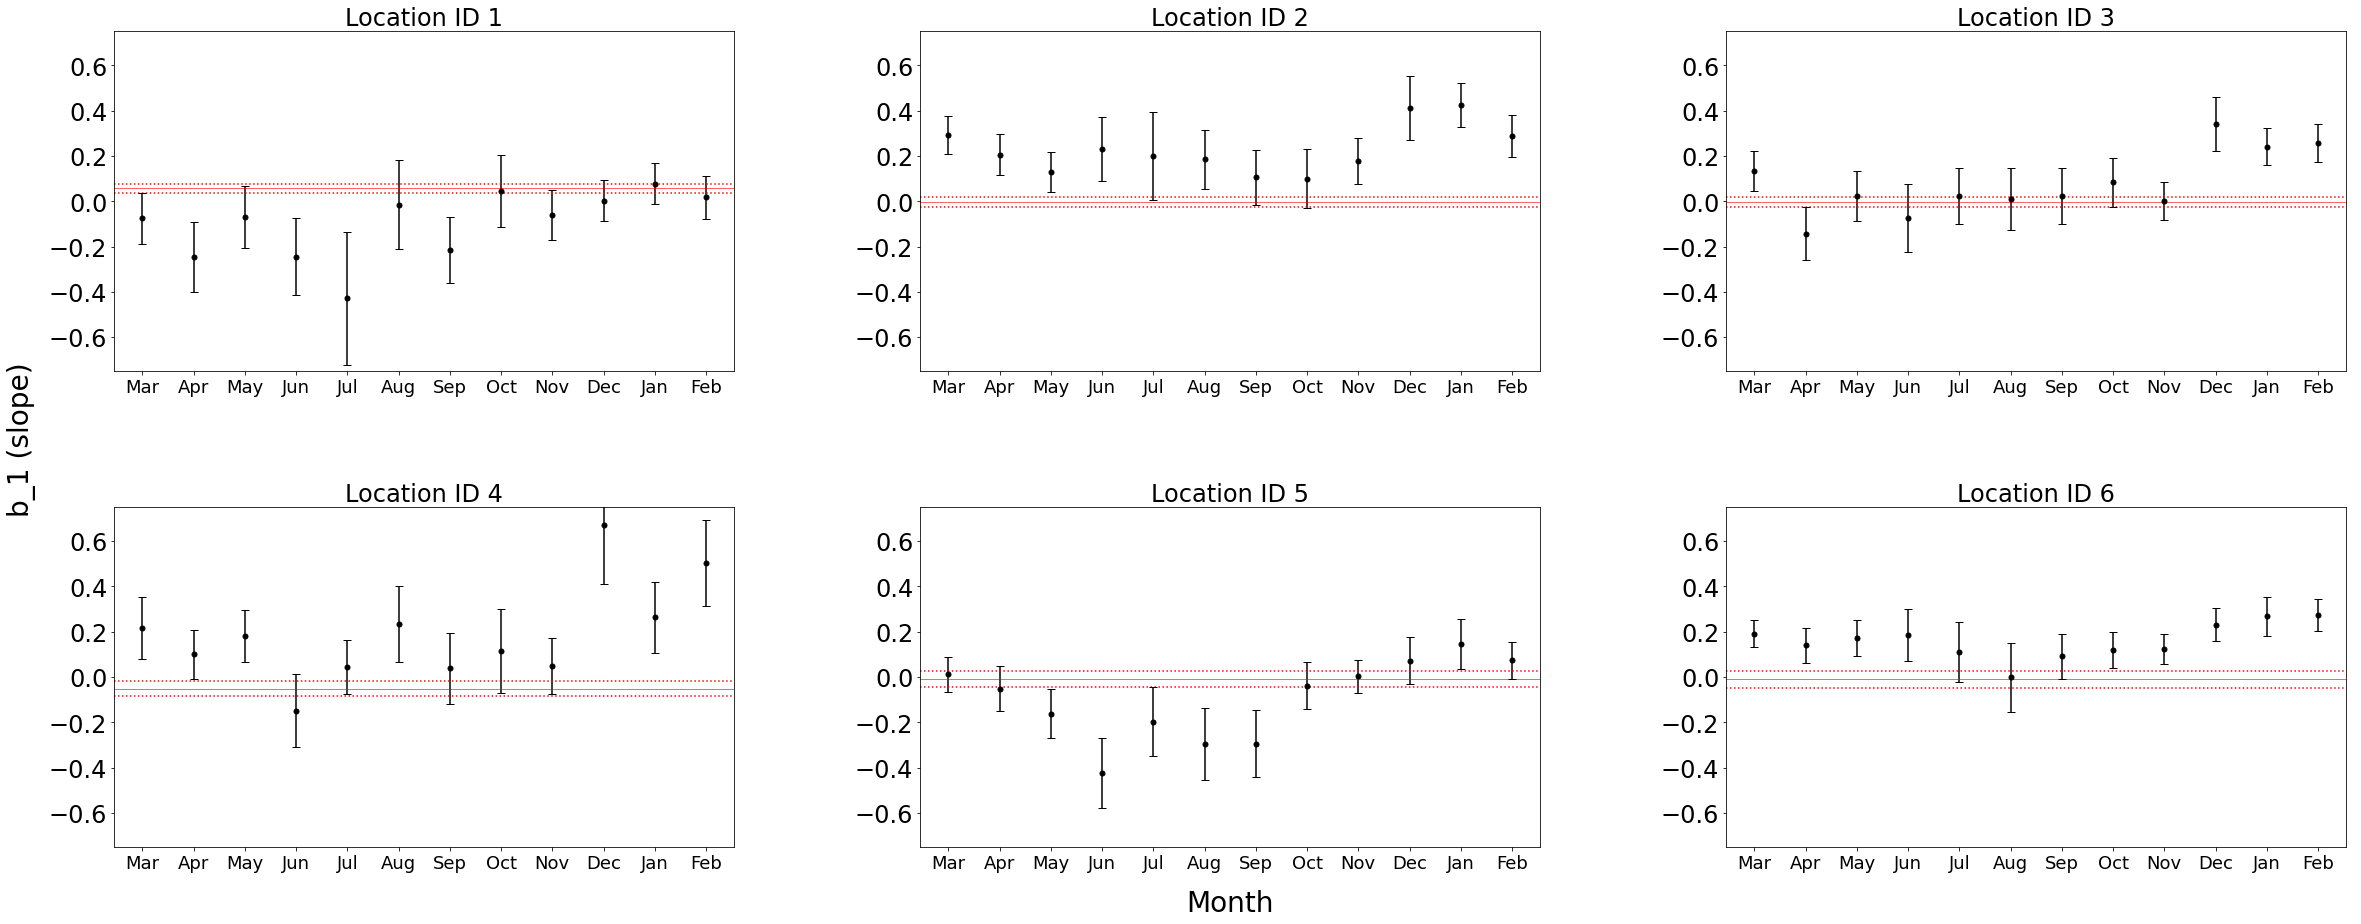

In [30]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =slope[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]

    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='dotted')
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='dotted')
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_temp_with_Vestland_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

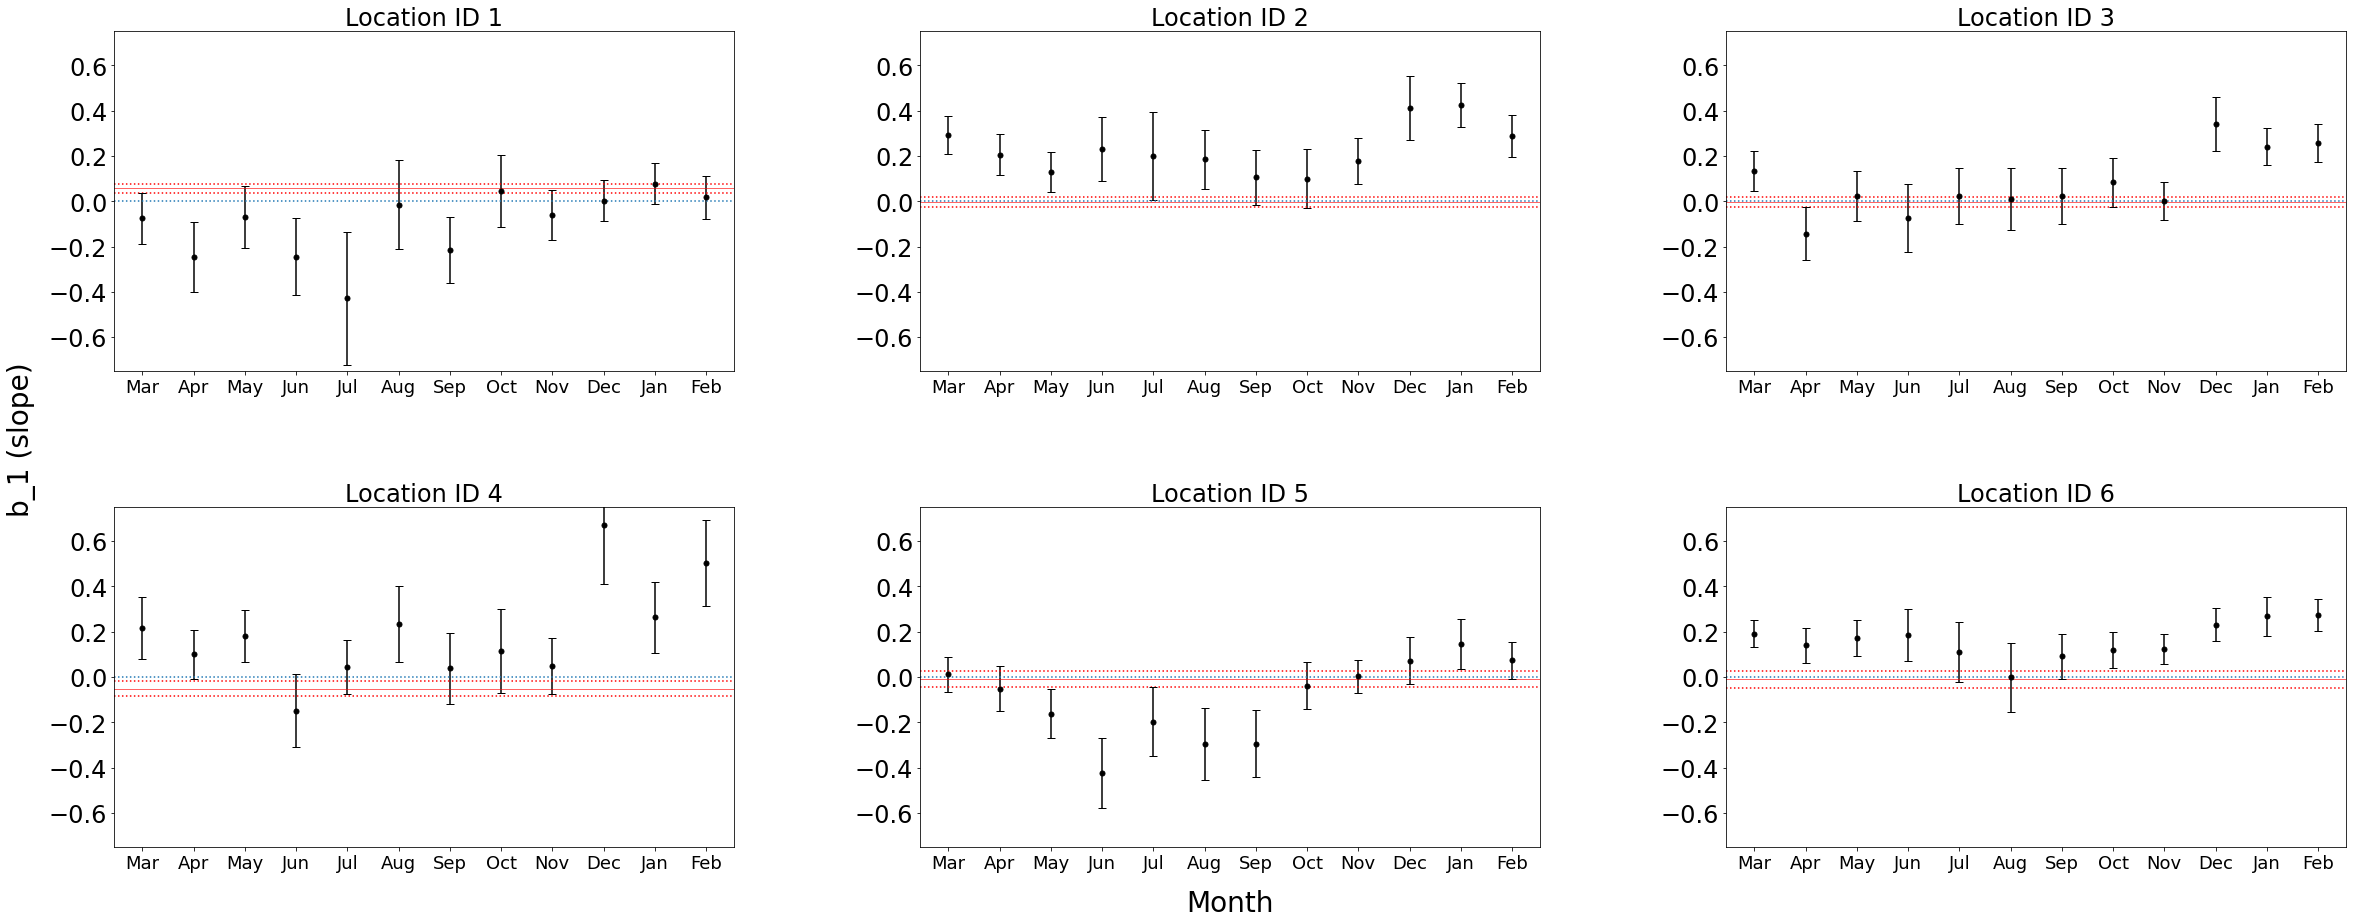

In [31]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =slope[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]

    
    #Vestland
    y_vestland = slope_Vestland[i]
    standard_error_slope_Vestland = np.array(standard_error_slope_Vestland)
    y_error_vestland =  standard_error_slope_Vestland*2
    y_error_vestland = y_error_vestland[i]


    plt.axhline(y = y_vestland, color = 'r', linestyle ='solid',linewidth=0.6)
    plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='dotted')
    plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='dotted')
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=25)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_temp_with_Vestland_2.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

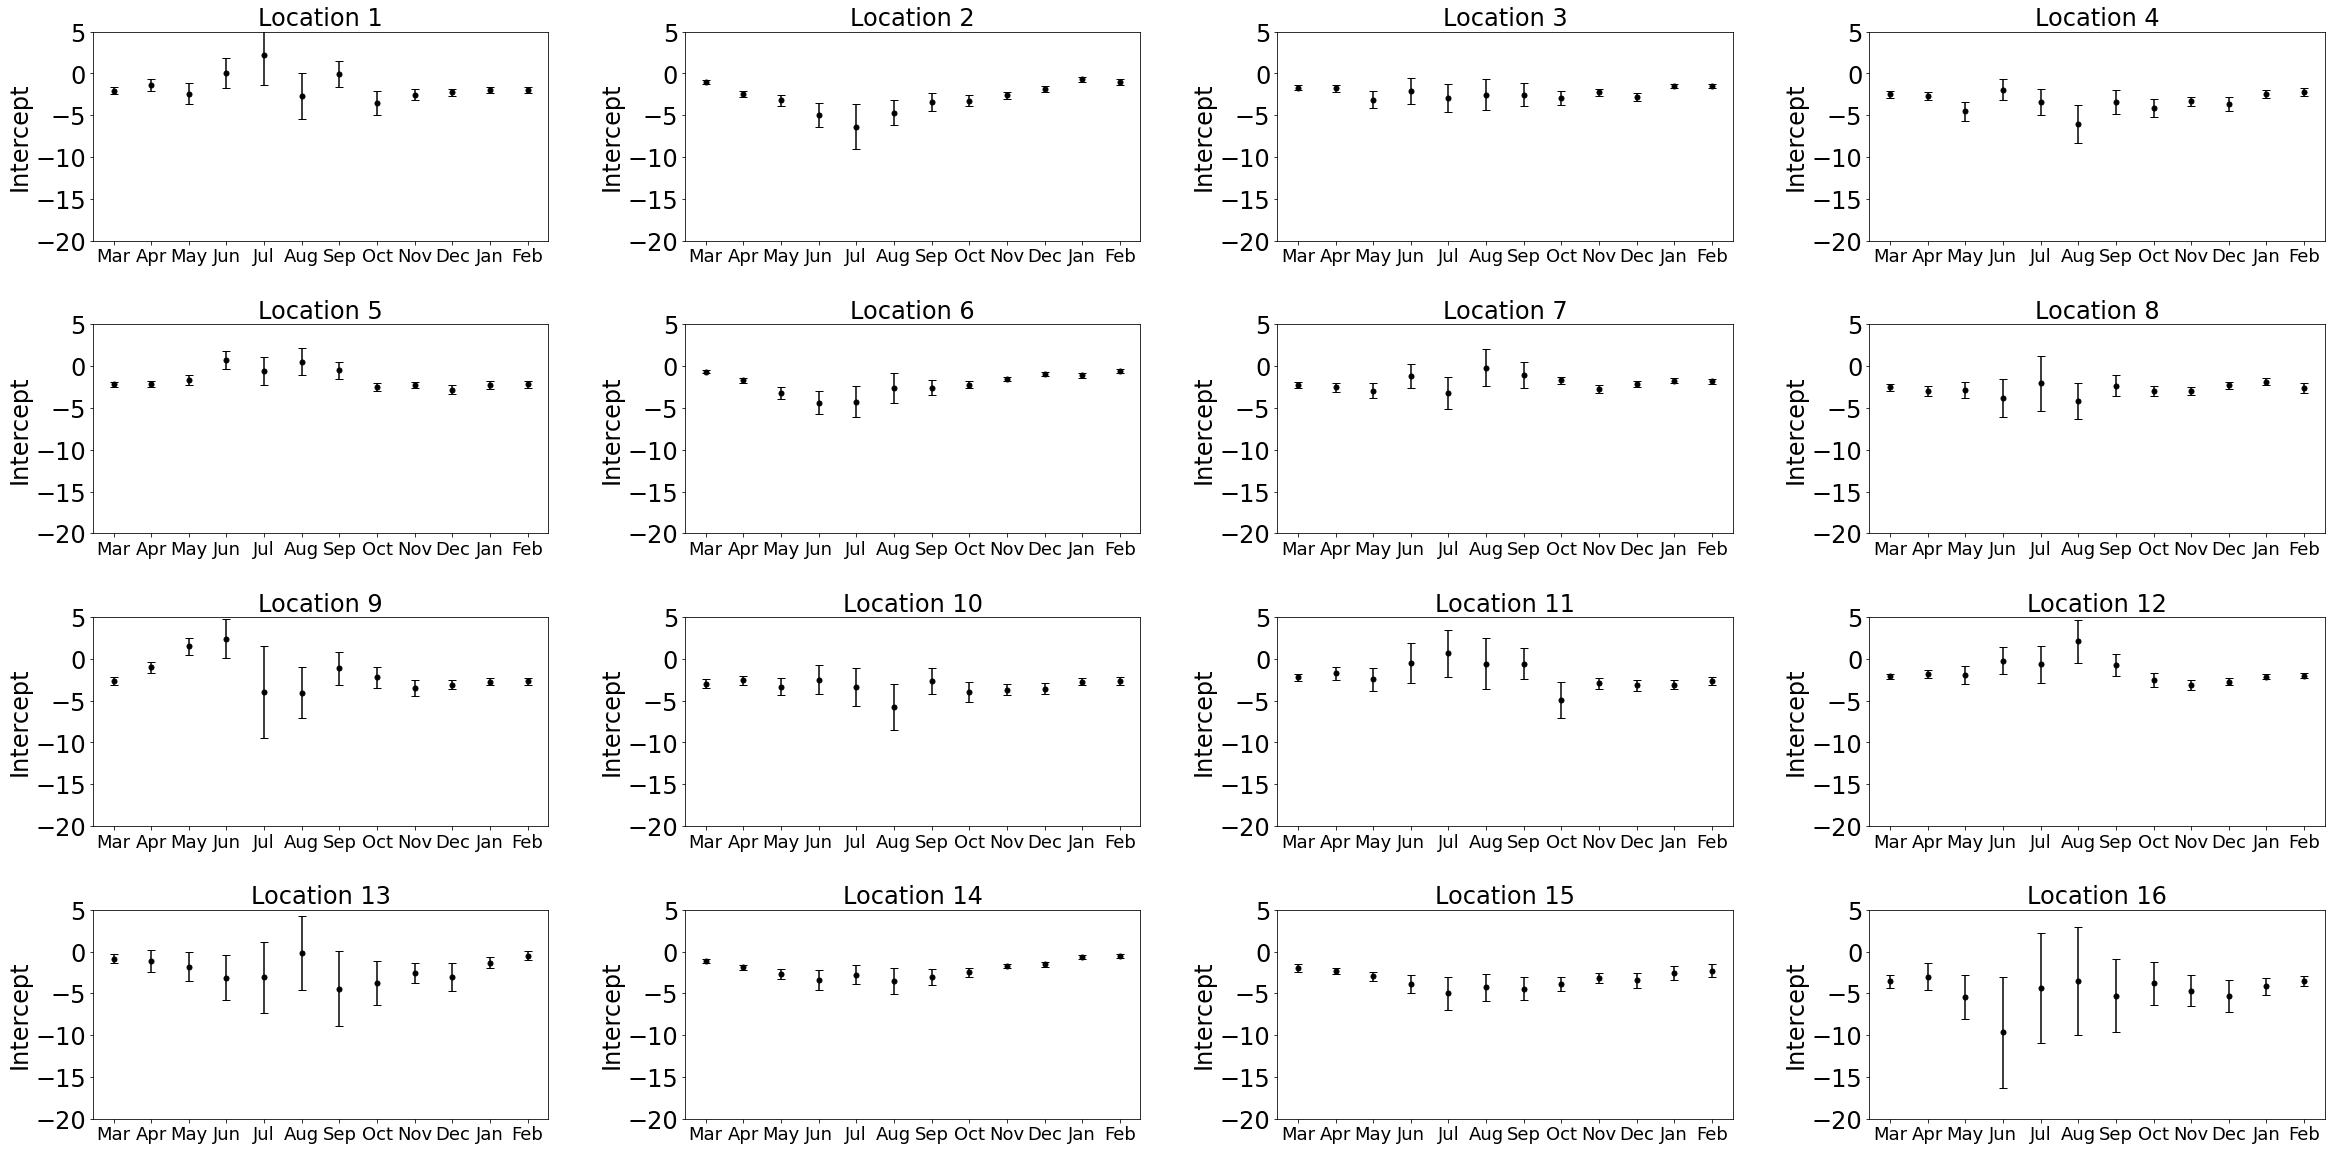

In [32]:
fig = plt.figure(figsize=(40, 20))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,16):
    plt.subplot(4,4,i+1)
    x = np.arange(1,13)

    # coeffisient
    y =intercepts[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef)
    y_error = standard_error_coef*2
    y_error = y_error[i]

    
    #Vestland
    #y_vestland = intercepts_Vestland[i]
    #standard_error_intercepts_Vestland = np.array(standard_error_coef_Vestland)
    #y_error_vestland =  standard_error_coef_Vestland*2
    #y_error_vestland = y_error_vestland[i]


    #plt.axhline(y = y_vestland, color = 'k', linestyle ='solid',linewidth=0.6)
    #plt.axhline(y = (y_vestland- y_error_vestland),  color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_vestland + y_error_vestland), color = 'r', linestyle ='solid',linewidth=0.5)
    

    # Monthly
    standard_error_slope = np.array(standard_error_coef)
    y_error = standard_error_coef*2
    y_error = y_error[i]


    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-20,5)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    
plt.savefig('Loc_intercepts_mean_daily_temp.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

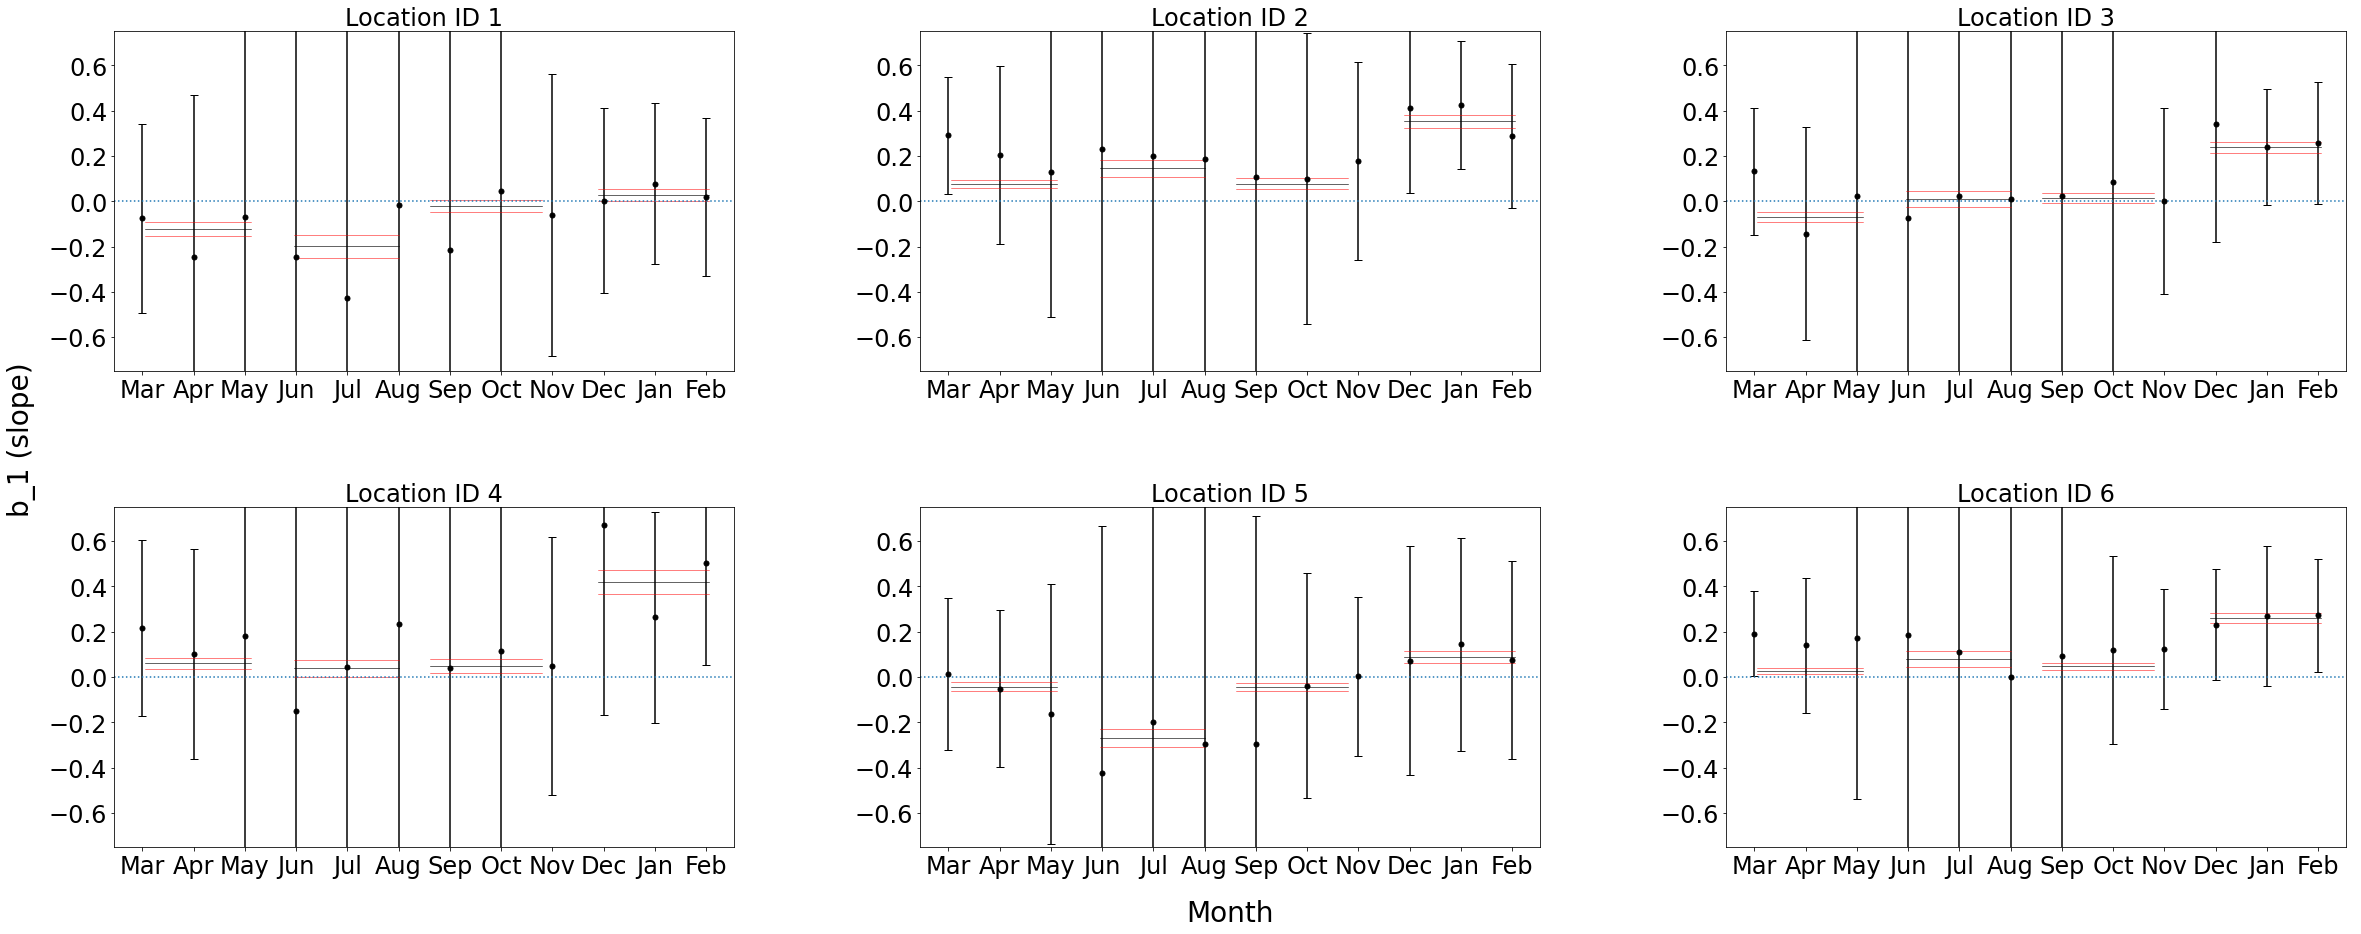

In [33]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_temp_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

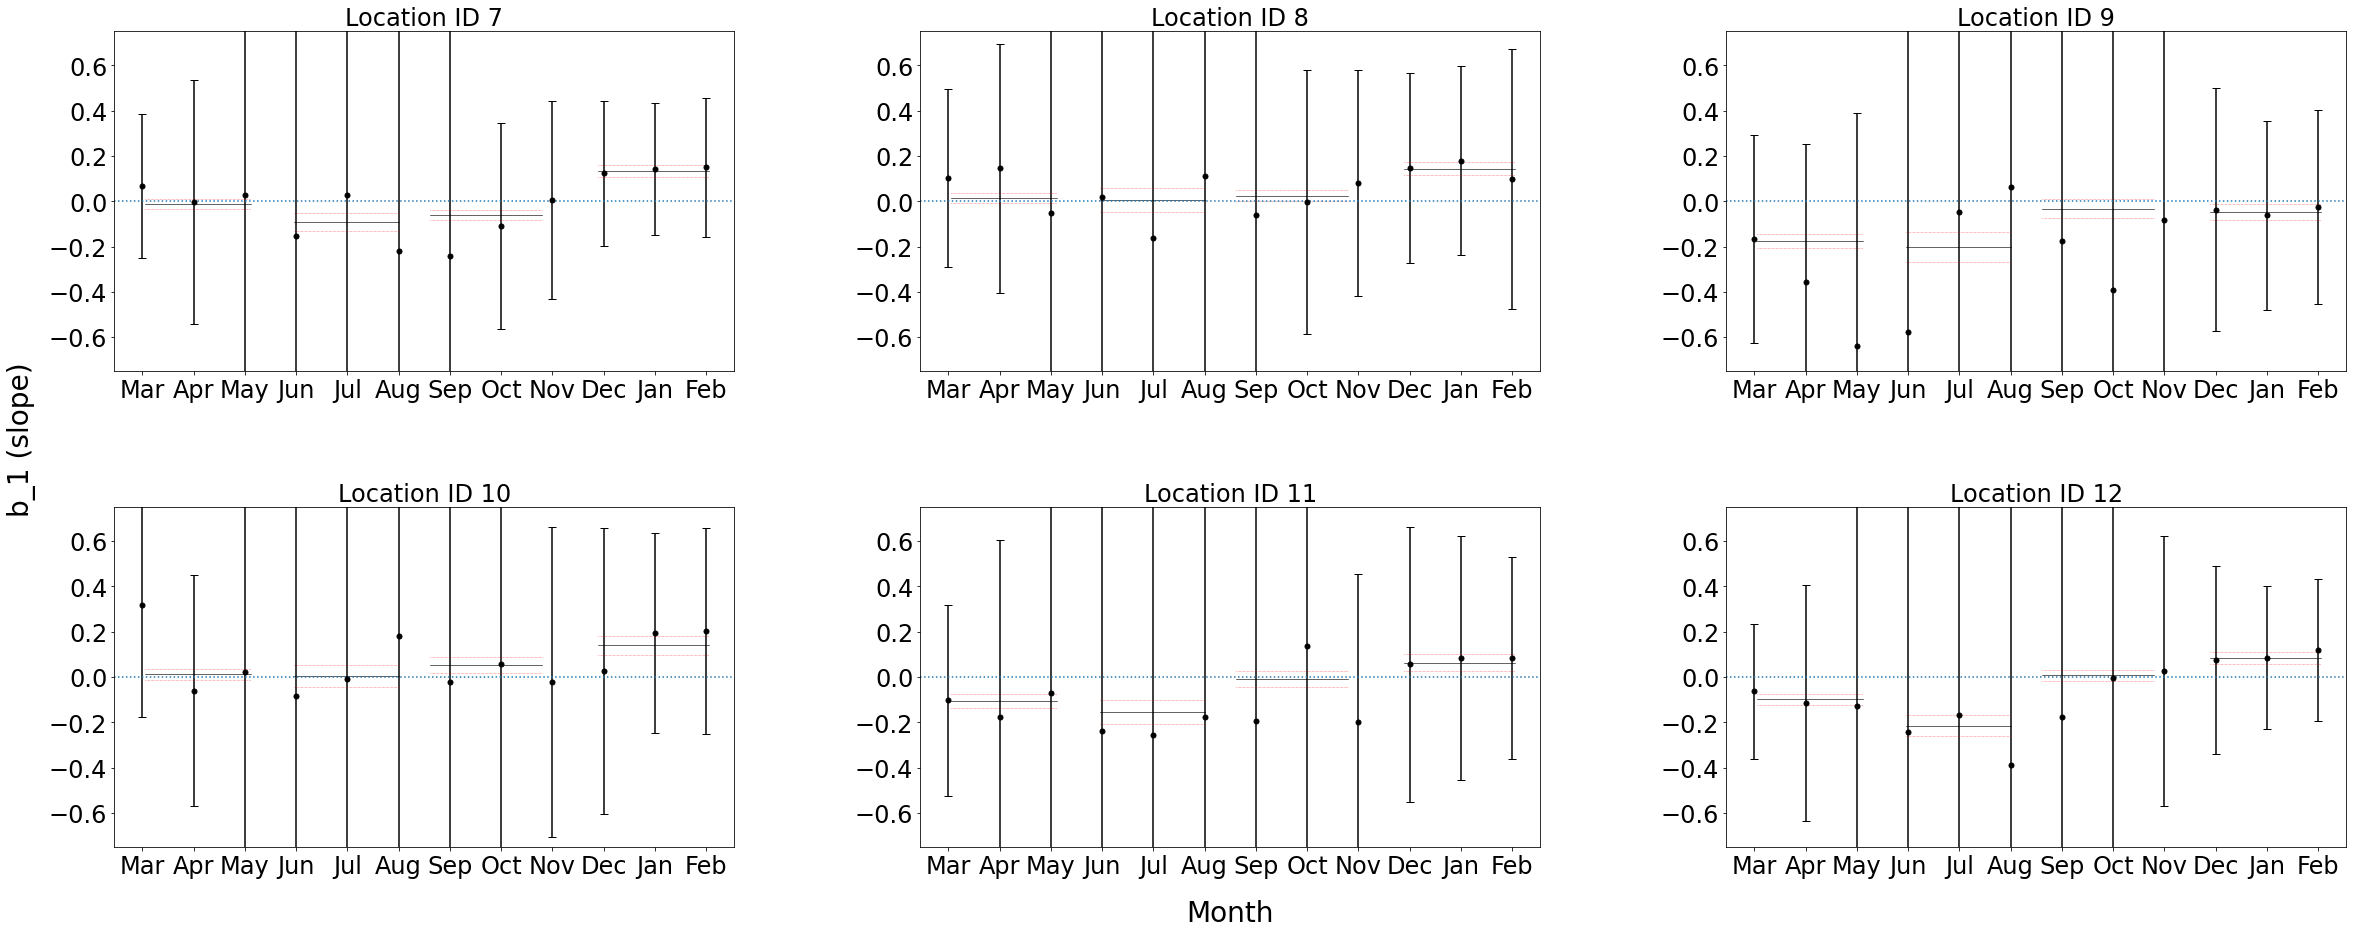

In [34]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error1 = standard_error_slope*2
    y_error1 = y_error1[i]


        
    plt.errorbar(x, y, yerr = y_error1,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_temp_2.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

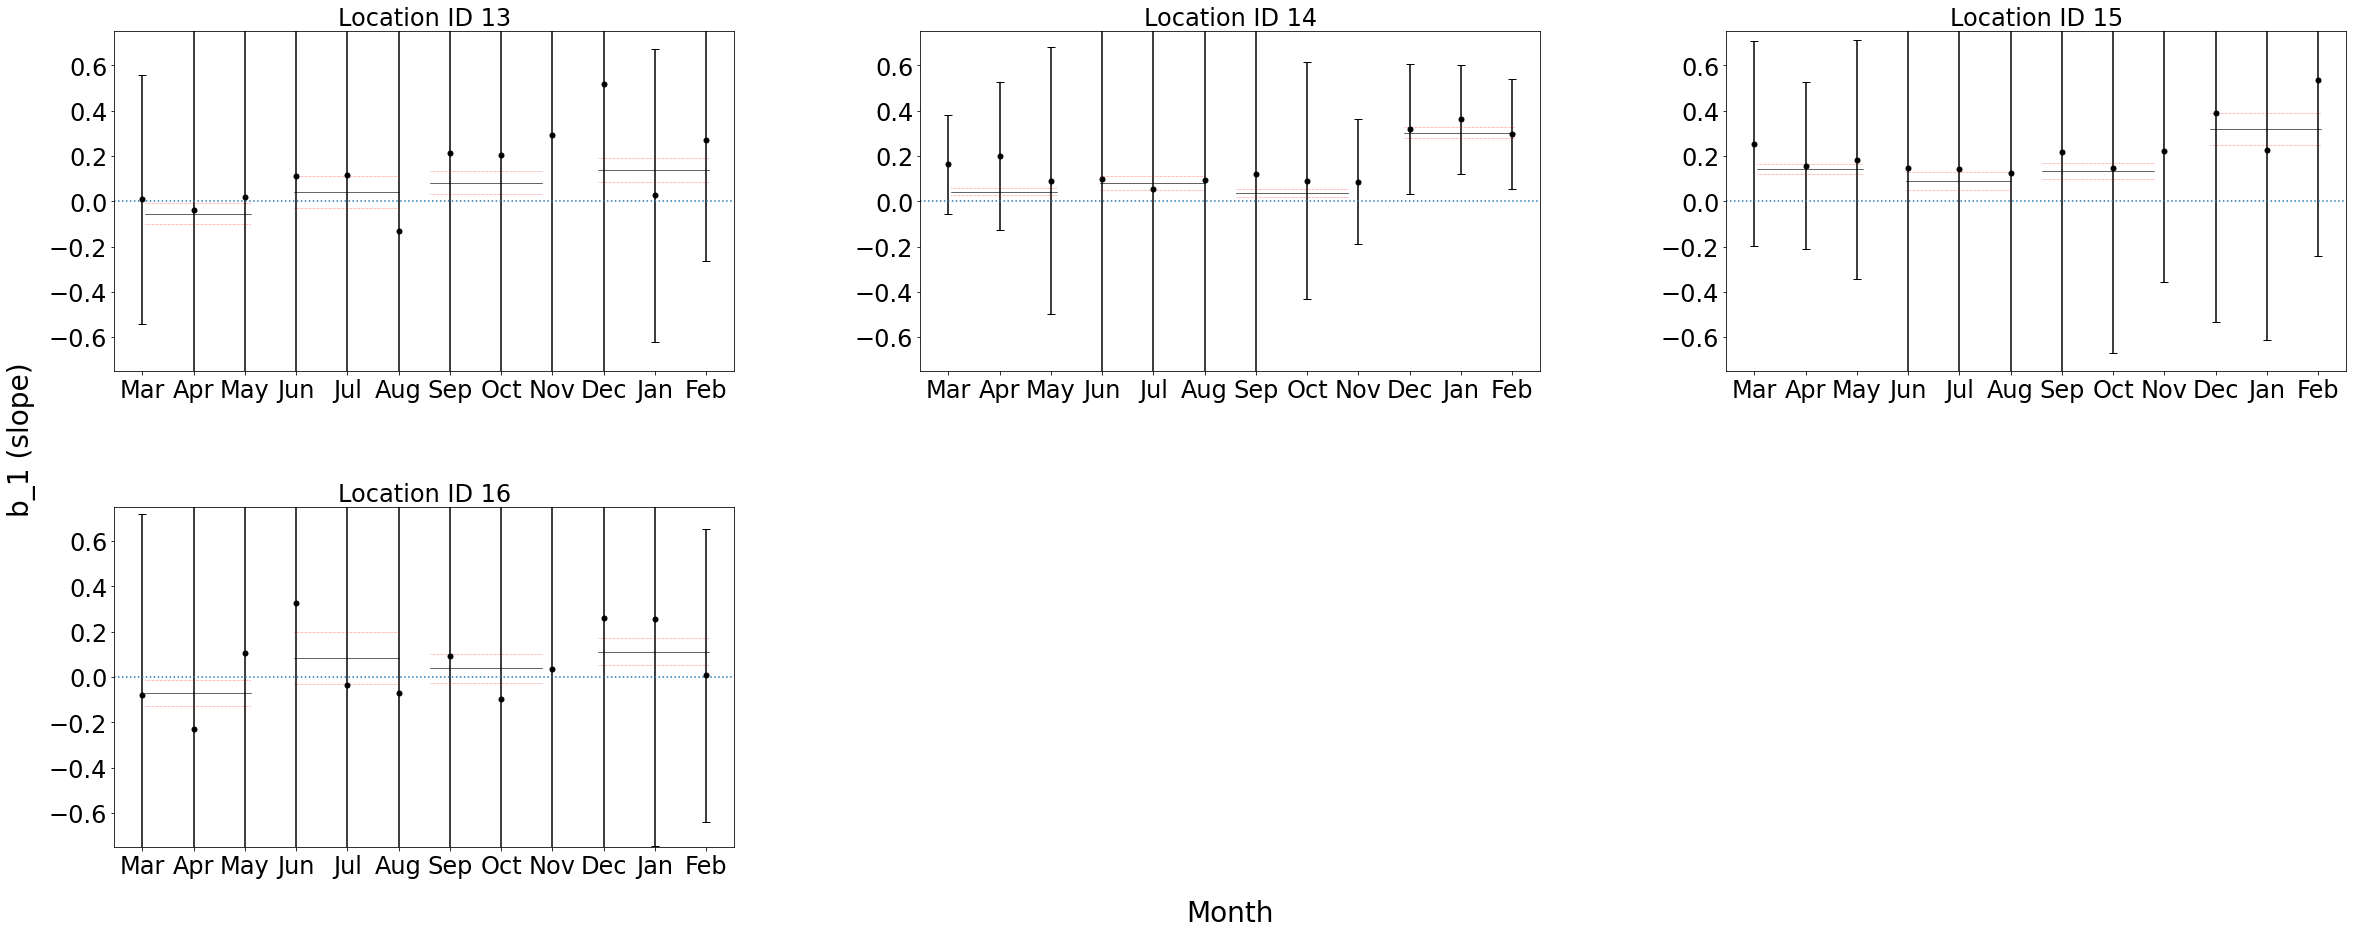

In [35]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(12,16):
    plt.subplot(2,3,i-11)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)
    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
    
plt.savefig('Loc_slope_mean_daily_temp_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

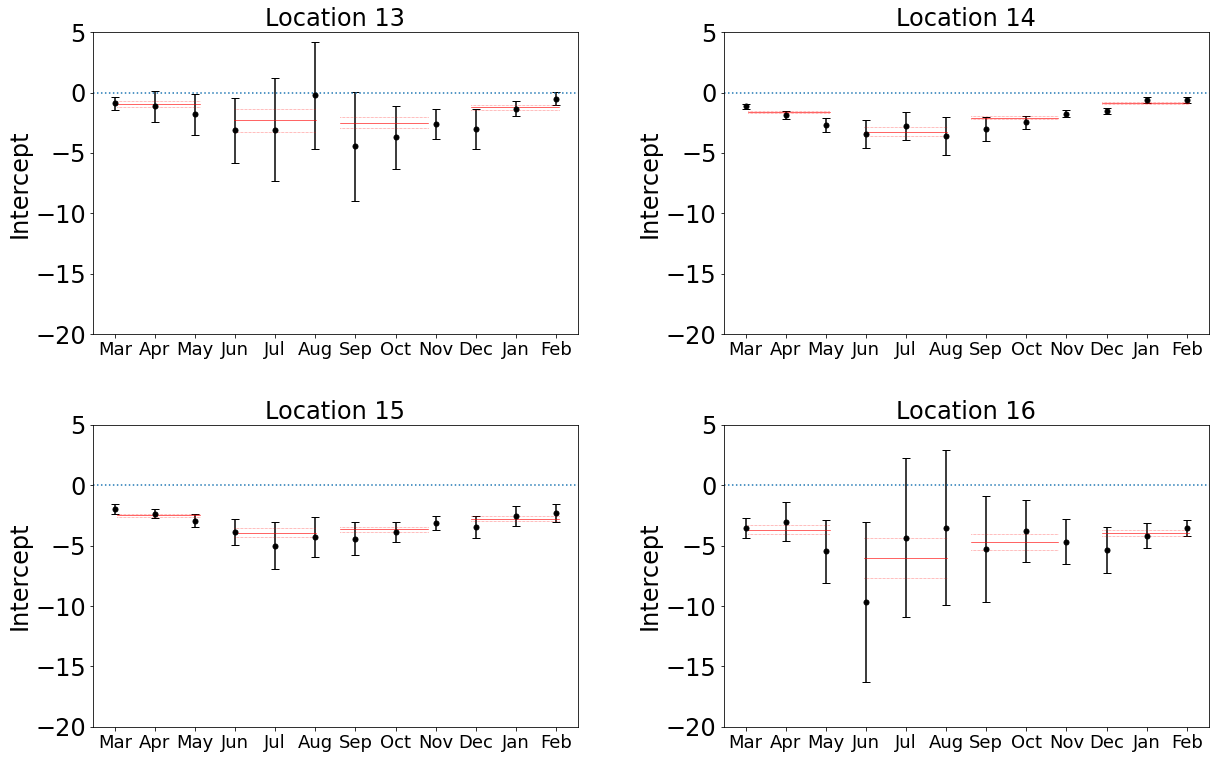

In [36]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(12,16):
    plt.subplot(3,2,i-9)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =intercepts[i]
    
    # Seasonal
    y_seasons = intercepts_seasons[i]
    standard_error_coef_seasons = np.array(standard_error_coef_seasons)
    y_error_seasons = standard_error_coef_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_coef = np.array(standard_error_coef)
    y_error = standard_error_coef*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    plt.ylabel('Intercept',fontsize=24)
    plt.ylim(-20,5)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    
plt.savefig('Loc_intercept_mean_daily_temp_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

### Probability of rockfall with daily temperature for each location for some chosen range of X (temperature)

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(0,6):
    plt.subplot(3,2,i+1)
    x= np.arange(0,30)
    #x = np.arange(1,13)
    y = intercepts[i][3] + slope[i][3]*x
    prob = np.exp(y)/(1+np.exp(y))
        
    plt.plot(x, prob, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel(y)
    plt.ylabel('Pr(Rockfall)',fontsize=24)
    plt.ylim(0,1)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    
plt.savefig('Prob_mean_daily_mean_temp_rockfall.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

### Summary tables

In [39]:
len(significance_coef)

16

In [40]:
#'Null model intercept estimate': [item[i] for item in intercepts_null_model

In [45]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Intercept estimate': [item[i] for item in intercepts],
        'SE intercept': [item[i] for item in standard_error_coef],
        'p < 0.05': [item[i] for item in significance_coef],
        'Slope estimate': [item[i] for item in slope],
        'SE slope': [item[i] for item in standard_error_slope],
        'p < 0.05 ': [item[i] for item in significance_slope]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_daily_temp_summary' + str(i) + '.xlsx')

In [39]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Log-likelihood': [item[i] for item in log_likelihood]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_daily_temp_LogLikelihood' + str(i) + '.xlsx')

In [41]:
data

,Location,Log-likelihood
0,1,0.145920
1,2,58.404080
2,3,46.378976
3,4,49.567390
4,5,3.490990
5,6,95.445243
6,7,12.229218
7,8,3.770744
8,9,0.150019
9,10,9.438225


In [40]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data2 = {'Location': locations,
        'Likelihood ratio chi-square': [item[i] for item in likelihood_ratio_chi]}

    data2 = pd.DataFrame(data)

    data2.to_excel('Logistic_regression_null_model_Likelihood_ratio_chi_square' + str(i) + '.xlsx')

In [42]:
data2

,Location,Log-likelihood
0,1,0.145920
1,2,58.404080
2,3,46.378976
3,4,49.567390
4,5,3.490990
5,6,95.445243
6,7,12.229218
7,8,3.770744
8,9,0.150019
9,10,9.438225


In [23]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Rockfall   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:               4.726e-05
Time:                        21:31:44   Log-Likelihood:                -49.802
converged:                       True   LL-Null:                       -49.804
Covariance Type:            nonrobust   LLR p-value:                    0.9453
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5199      0.324    -10.872      0.000      -4.155      -2.885
x1             0.0065      0.095      0.069      0.945      -0.180       0.193
==============================================================================
"""

In [51]:
log_likelihood

[[-145.03079256658793,
  -101.33497728615879,
  -80.06329923484638,
  -104.36989482581214,
  -55.49751093614138,
  -82.41997948489431,
  -101.30113423074931,
  -66.97926080731092,
  -83.9212862104703,
  -136.3274524844279,
  -191.9053140707081,
  -157.32682807975738],
 [-205.6310138976289,
  -123.1390903544556,
  -104.72729186025384,
  -71.84957540772048,
  -33.09201226280577,
  -89.70323523253698,
  -91.13662714198459,
  -75.27308314394642,
  -90.9207920714594,
  -99.93561739840683,
  -168.5266352409343,
  -148.3242531002571],
 [-242.00635978476058,
  -126.34680689982122,
  -83.5505396717752,
  -85.89253556284248,
  -102.80456099596873,
  -117.6228281862951,
  -120.75204818160658,
  -123.96302614617115,
  -128.33043816059615,
  -139.80242637343537,
  -251.1478444329597,
  -222.9174858168074],
 [-101.93136443374334,
  -105.45843118384384,
  -62.99940570265282,
  -69.19679585021333,
  -82.75798280251806,
  -63.05228371794123,
  -66.13882335157425,
  -45.767205544799964,
  -56.2898490095

In [53]:
mean_llh_months = np.mean(log_likelihood, axis=0)
mean_llh_months = pd.DataFrame(mean_llh_months)
mean_llh_months.to_excel('Log_likelihood_mean_daily_temp' + '.xlsx')

In [78]:
for i in range(0,12):
    dat = {'Location':locations,
          '[0.05':[item[i] for item in confidence_interval[1][0][1]],
          '[0.95':[item[i] for item in confidence_interval[1][1][1]]}
    dat = pd.DataFrame(dat)
    dat.to_excel('Lr_mean_daily_temp_confidence_interval' + str(i) + '.xlsx')

TypeError: 'float' object is not subscriptable

In [70]:
confidence_interval[1][1]

,0,1
const,-2.826360,-2.056510
x1,0.116032,0.295084


In [74]:
confidence_interval[1][1][1][1]

0.29508429396544417

In [55]:
confidence_interval

[[              0         1
  const -2.477736 -1.659094
  x1    -0.188085  0.036336,
                0         1
  const -2.089669 -0.685000
  x1    -0.398369 -0.096106,
                0         1
  const -3.603226 -1.205802
  x1    -0.205566  0.065289,
                0         1
  const -1.700344  1.841814
  x1    -0.411907 -0.076969,
                0         1
  const -1.327510  5.703818
  x1    -0.715768 -0.139496,
                0         1
  const -5.417277  0.051391
  x1    -0.206680  0.176208,
                0         1
  const -1.628832  1.456105
  x1    -0.356454 -0.073581,
                0         1
  const -4.938388 -2.137290
  x1    -0.111170  0.199468,
                0         1
  const -3.157779 -1.933554
  x1    -0.169529  0.048502,
                0         1
  const -2.682726 -1.880778
  x1    -0.086806  0.091563,
                0         1
  const -2.341120 -1.643843
  x1    -0.011721  0.167049,
                0         1
  const -2.336689 -1.650927
  x1    -